# 🖥️ Desarrollo del Análisis de Rotación de Empleados

Se refiere a la cantidad de empleados que dejan una empresa y son reemplazados en un período de tiempo determinado.
Objetivo: Análisis descriptivo de la rotación voluntaria de empleados pueden estar influenciados por múltiples factores.

Pero... ¿qué es exactamente la rotación? Se refiere a la cantidad de empleados que dejan una empresa generando su próximo reemplazo.
Las causas principales pueden ser : Renuncias voluntarias (empleados que consiguen otro trabajo o renuncian por motivos personales); Despidos (por bajo rendimiento o reestructuración); Jubilaciones (en algunos casos).

Objetivo metodológico:

1.- Análisis Descriptivo: Nos enfocamos en resumir y describir los datos sin sacar conclusiones profundas.
Técnicas usadas: tablas, gráficos de barras, histogramas, medidas de tendencia central (media, mediana, moda).

2.- Análisis Diagnóstico: Quisimos encontrar las relaciones y causas de los datos descritos.
Técnicas usadas: correlaciones, segmentaciones y análisis de tendencias fundamental (gráficos de líneas).

Dentro de cada análisis podríamos encontrar:

1. Variables Numéricas

    1.1.- Análisis Descriptivo

    1.2.- Análisis Diagnóstico

        A. Análisis Bivariado 

        B. Visualización del Análisis 

2. Variables Categóricas

    2.1.- Análisis Descriptivo

    2.2.- Análisis Diagnóstico

        A. Análisis Bivariado

        B. Visualización del Análisis

3. Variables Categóricas Ordinales

    3.1.- Análisis Descriptivo

    3.2.- Análisis Diagnóstico

        A. Análisis Bivariado

        B. Visualización del Análisis

4. Análisis de Contingencias

# 1. Variables Numéricas

## 1.1.- 🔍 Análisis Descriptivo

In [3]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


Para este análisis general, en primer lugar, creamos un DataFrame tras la lectura del archivo .csv, el cual contiene los datos de los empleados que nos ha entregado la empresa.

In [4]:
df = pd.read_csv('df_filtrado_notnulls.csv')

In [5]:
df.sample(10)

,employee_turnover,business_travel_frequency,distance_from_home_km,education_level,environmental_satisfaction_level,gender,job_involvement_level,job_level,job_satisfaction_level,marital_status,num_companies_worked,overtime_hours,percent_salary_hike,standard_work_hours,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,remote_work,total_years_worked,annual_salary,work_life_balance
535,no,travel_rarely,23.0,3,2.0,male,4,1,4,unknown,1,none,11,part_time,2,3,6,4,1999,yes,10.0,27250.00,3.0
398,no,travel_rarely,7.0,4,3.0,male,3,2,3,divorced,1,none,13,part_time,3,4,10,9,1993,yes,10.0,34910.00,2.0
600,no,travel_frequently,5.0,4,2.0,male,2,1,4,divorced,9,no,12,part_time,1,3,5,3,1993,yes,10.0,28111.13,2.0
496,no,unknown,7.0,3,4.0,female,2,2,1,unknown,8,no,19,part_time,0,2,7,7,1996,no,10.0,53914.11,1.0
4,no,unknown,3.0,3,1.0,female,4,4,1,divorced,2,no,12,none,1,5,19,8,1977,no,10.0,53914.11,3.0
1215,no,travel_frequently,2.0,2,3.0,female,2,1,2,married,4,none,14,part_time,1,4,6,5,1985,no,9.0,24680.00,2.0
1366,no,unknown,3.0,4,3.0,male,2,1,4,unknown,3,no,17,part_time,3,2,0,0,1989,yes,6.0,28111.13,3.0
442,no,travel_rarely,2.0,2,4.0,female,2,2,4,divorced,1,none,19,none,2,3,10,9,1978,yes,10.0,53914.11,3.0
1278,no,unknown,18.0,4,3.0,male,4,1,4,married,4,no,18,part_time,2,2,1,0,1987,yes,4.0,28111.13,3.0
688,no,unknown,8.0,2,4.0,female,3,1,4,unknown,1,no,21,none,0,3,5,2,1995,yes,10.0,53914.11,3.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home_km,1614.0,8.667286,7.459181,1.0,2.0,7.00,11.0,29.0
education_level,1614.0,2.925031,1.022357,1.0,2.0,3.00,4.0,5.0
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.00,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.00,3.0,4.0
job_level,1614.0,2.068154,1.101344,1.0,1.0,2.00,3.0,5.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.00,4.0,4.0
num_companies_worked,1614.0,2.673482,2.506152,0.0,1.0,2.00,4.0,9.0
percent_salary_hike,1614.0,15.165428,3.648610,11.0,12.0,14.00,18.0,25.0
stock_option_level,1614.0,0.791202,0.842396,0.0,0.0,1.00,1.0,3.0
training_sessions_last_year,1614.0,2.809789,1.297765,0.0,2.0,3.00,3.0,6.0


## 1.2.- 📊 Análisis Diagnóstico

### Correlación entre las Variables Numéricas del DataFrame tras su Limpieza en la Fase 2

        A. Análisis Bivariado

### Estableciendo Correlaciones Numéricas

La correlación de Pearson es útil porque mide la relación lineal entre dos variables numéricas. Nos ayuda a responder preguntas como:

    ❇️ ¿Qué factores influyen en el abandono de empleados?
    ❇️ ¿Existe relación entre el salario y la satisfacción laboral?
    ❇️ ¿A mayor distancia del trabajo, hay más rotación?

Nos ayuda a visualizar patrones ocultos: Algunas relaciones no son obvias sin un análisis de correlación. Por ejemplo: Si "work_life_balance" y "employee_turnover" tienen correlación negativa fuerte, mejorar el equilibrio vida-trabajo puede reducir la rotación.

▶️¿Cómo funciona?
La correlación de Pearson devuelve un valor entre -1 y 1:

    🔸 Cerca de +1 → Relación positiva fuerte (Si una variable sube, la otra también)
    🔸 Cerca de -1 → Relación negativa fuerte (Si una sube, la otra baja)
    🔸 Cerca de 0 → No hay relación lineal

In [7]:
df_correlaciones = df.select_dtypes(include=['number']).corr(method="pearson")
df_correlaciones

,distance_from_home_km,education_level,environmental_satisfaction_level,job_involvement_level,job_level,job_satisfaction_level,num_companies_worked,percent_salary_hike,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,total_years_worked,annual_salary,work_life_balance
distance_from_home_km,1.000000,0.027864,-0.019420,0.020938,0.008120,0.004403,-0.007573,0.057036,0.067375,-0.051308,0.010439,0.013331,0.003625,-0.000816,-0.012235,-0.032258
education_level,0.027864,1.000000,-0.037240,0.043048,0.100346,-0.006928,0.116021,-0.009138,0.012767,-0.039725,0.070010,0.068201,-0.201536,0.125259,0.093245,0.021237
environmental_satisfaction_level,-0.019420,-0.037240,1.000000,-0.007909,0.007135,0.008300,-0.001017,-0.040069,0.008002,-0.048562,0.008301,-0.004162,-0.015337,0.012955,0.009222,0.047702
job_involvement_level,0.020938,0.043048,-0.007909,1.000000,-0.000297,-0.020332,0.026374,-0.004661,0.035480,-0.012010,-0.015409,0.040507,-0.036568,0.022475,-0.017915,-0.013044
job_level,0.008120,0.100346,0.007135,-0.000297,1.000000,-0.015388,0.143060,-0.041995,0.022030,-0.026059,0.532415,0.365260,-0.507748,0.620530,0.882054,0.021209
job_satisfaction_level,0.004403,-0.006928,0.008300,-0.020332,-0.015388,1.000000,-0.054967,0.027774,0.013897,0.003339,-0.006868,-0.034596,0.010725,-0.024691,0.000526,-0.024389
num_companies_worked,-0.007573,0.116021,-0.001017,0.026374,0.143060,-0.054967,1.000000,-0.003378,0.039339,-0.080868,-0.129465,-0.119690,-0.289166,0.210844,0.110463,-0.012054
percent_salary_hike,0.057036,-0.009138,-0.040069,-0.004661,-0.041995,0.027774,-0.003378,1.000000,0.011043,-0.006836,-0.041213,-0.010821,-0.006728,-0.031841,-0.029821,0.001218
stock_option_level,0.067375,0.012767,0.008002,0.035480,0.022030,0.013897,0.039339,0.011043,1.000000,0.007315,0.013781,0.027543,-0.039405,0.050299,0.014915,-0.006032
training_sessions_last_year,-0.051308,-0.039725,-0.048562,-0.012010,-0.026059,0.003339,-0.080868,-0.006836,0.007315,1.000000,0.008089,0.008678,0.031776,-0.063411,-0.025426,0.018330


*Medidas de Correlación: Relacionando Columnas*

A continuación vemos todas las combinaciones posibles de estas variables, lo cual nos ayudará a establecer las relaciones en los resultados.

In [8]:
from itertools import combinations
# Definimos la lista los nombres de las variables numéricas 
numericas = df.select_dtypes(include = np.number).columns
# Usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))
combinaciones

[('distance_from_home_km', 'education_level'),
 ('distance_from_home_km', 'environmental_satisfaction_level'),
 ('distance_from_home_km', 'job_involvement_level'),
 ('distance_from_home_km', 'job_level'),
 ('distance_from_home_km', 'job_satisfaction_level'),
 ('distance_from_home_km', 'num_companies_worked'),
 ('distance_from_home_km', 'percent_salary_hike'),
 ('distance_from_home_km', 'stock_option_level'),
 ('distance_from_home_km', 'training_sessions_last_year'),
 ('distance_from_home_km', 'years_at_company'),
 ('distance_from_home_km', 'years_with_current_manager'),
 ('distance_from_home_km', 'birth_year'),
 ('distance_from_home_km', 'total_years_worked'),
 ('distance_from_home_km', 'annual_salary'),
 ('distance_from_home_km', 'work_life_balance'),
 ('education_level', 'environmental_satisfaction_level'),
 ('education_level', 'job_involvement_level'),
 ('education_level', 'job_level'),
 ('education_level', 'job_satisfaction_level'),
 ('education_level', 'num_companies_worked'),
 ('

        B. Visualización del Análisis

 - Realizamos una matriz de correlación para ver qué variables están más fuertemente correlacionadas con la rotación de empleados. Esto puede incluir tanto variables numéricas como categóricas ordinales.

- Para ver la información de manera más intuitiva elaboramos un gráfico de tipo heatmap en el que se puede obervar el nivel de las correlaciones entre variables numéricas en función del color del índice de la matriz.

Text(0.5, 1.0, 'Matriz de Correlación Spearman')

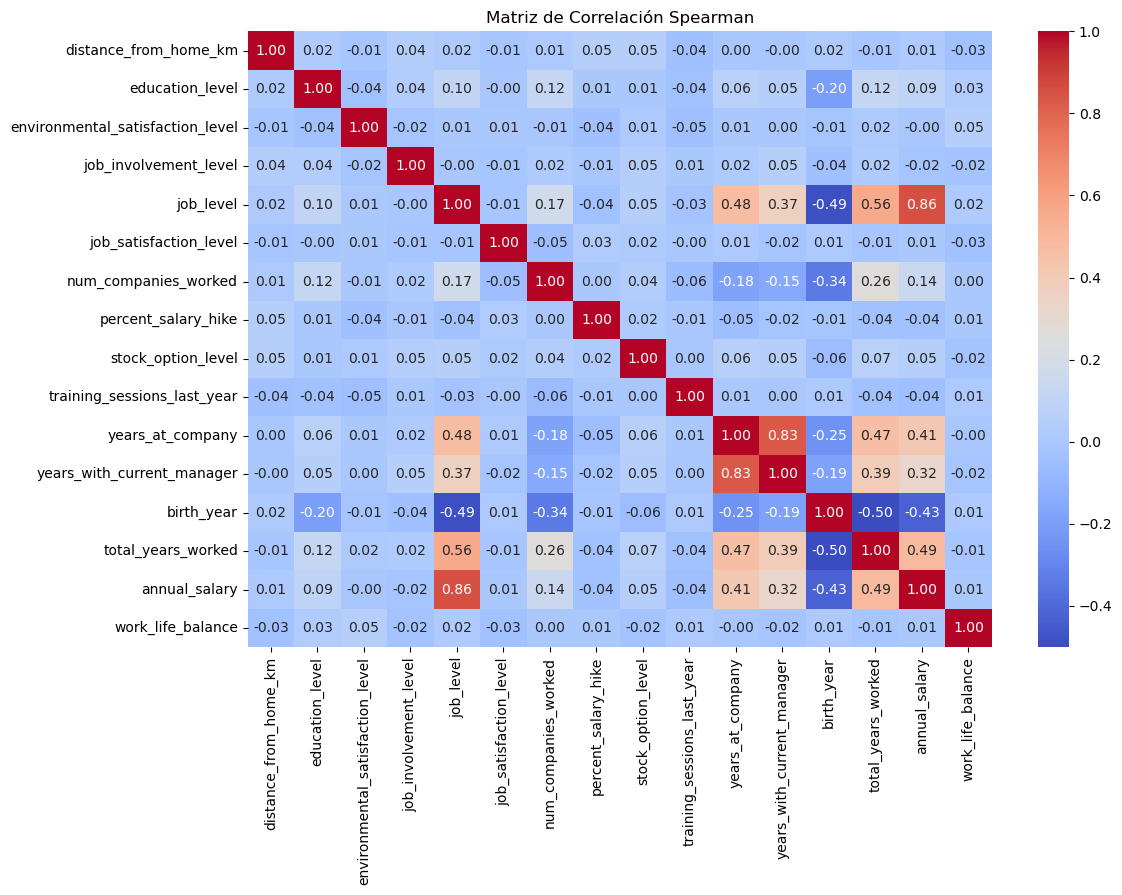

In [9]:
# Matriz de correlación Pearson

# Vamos a calcular la correlación de Pearson (que es la correlación estándar para variables numéricas) entre todas las variables numéricas del dataset.
# Filtro solo las columnas numéricas del DataFrame

df_numeric = df.select_dtypes(include=['number'])

# Calculamos la correlación de Spearman entre las variables numéricas
spearman_corr = df_numeric.corr(method='spearman')  

# Obtenemos la gráfica de la matriz de correlación de Spearman con un heatmap
plt.figure(figsize=(12, 8)) # establezco el tamaño del grafico.
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación Spearman')

# Spearman_corr = Es la tabla con los valores de correlación que calculamos en el paso anterior.
# annot=True: Muestra los valores de correlación dentro de cada celda del mapa de calor.
# cmap='coolwarm': Especifica los colores para el mapa de calor, donde los colores fríos representan valores bajos y los colores cálidos valores altos.
# fmt='.2f': Muestra los valores con 2 decimales.


### **Análisis de la Matriz de Correlación**

**¿Qué muestra el gráfico anterior?**
El gráfico es un mapa de calor que muestra la relación entre todas las variables numéricas en el dataset. Los valores de la correlación de Spearman estan representados como números en cada celda:

Un valor cercano a 1 indica una relación muy fuerte entre dos variables (cuando una sube, la otra también lo hace).
Un valor cercano a -1 indica una relación inversa muy fuerte (cuando una sube, la otra baja).
Un valor cercano a 0 indica que no hay relación significativa entre las dos variables.

🔻 **Correlaciones más fuertes (+0.5 o más)**

1. "annual_salary" y "job_level"(0.88): Cuanto más alto es el nivel del puesto, mayor es el salario. Tiene lógica pues los ascensos llevan a mejores sueldos.
2. "years_at_company" y "years_with_current_manager" (0.76):  Si un empleado lleva más tiempo en la empresa, también ha estado con su gerente por más tiempo. Indica estabilidad en los equipos de trabajo.
3. "total_years_worked" y "years_at_company" (0.52): Los empleados que han trabajado más años en otras empresas también llevan más tiempo en la empresa actual.
4. "years_at_company" y "job_level" (0.53): Los empleados con más años en la empresa tienden a estar en niveles laborales más altos.

🔻 **Correlaciones negativas fuertes (-0.5 o menos)**

1. "birth_year" está fuertemente correlacionado de manera negativa con total_years_worked (-0.55) y annual_salary (-0.56).** Esto sugiere que cuanto más joven es un empleado, menos años ha trabajado en otras empresas y tienen salarios más bajos. 
2. "job_level" y "birth_year" (-0.51): Los empleados más jóvenes suelen estar en niveles laborales más bajos.

🔻 **Correlaciones moderadas (0.2 a 0.5)**

1. "years_at_company" y "annual_salary" (0.47): Cuanto menos tiempo en la empresa, menor es el salario. La antigüedad es recompensada.
2. "years_at_company" y "birth_year" (-0.31): Cuanto menos años lleva en la empresa más joven es el empleado.
3. "num_companies_worked" tiene una relación positiva con "total_years_worked" (0.21), lo que sugiere que las personas con más experiencia laboral han trabajado en más número de empresas.
3. "education_level" tiene una correlación algo moderada con "total_years_worked" (0.12), pero una correlación negativa con "birth_year" (-0.20), lo que indica que los empleados mayores pueden haber tenido menos nivel educativo en promedio.

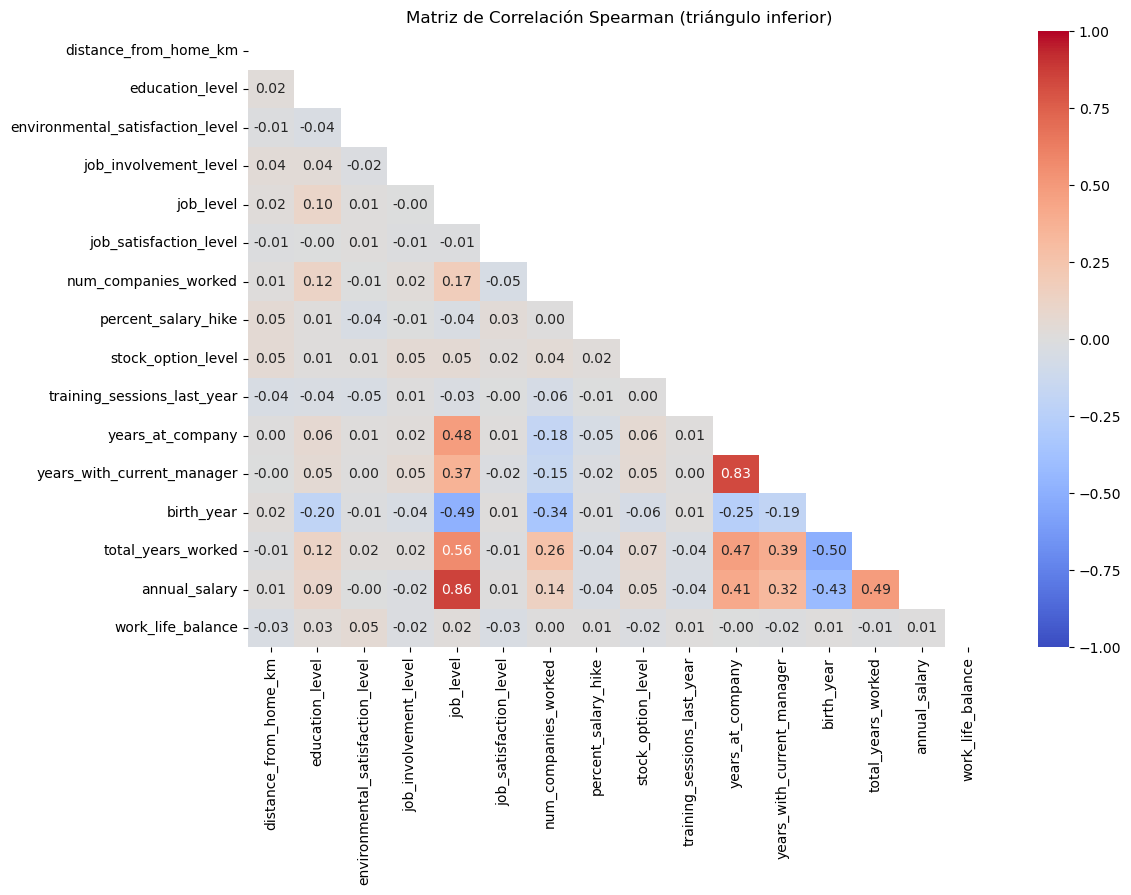

In [10]:
# AHORA YA PODREMOS ENTENDER DE UNA FORMA MÁS AMIGABLE LOS RESULTADOS DE LA MATRIZ DE CORRELACIÓN
# establecemos el tamaño de la gráfica

# 1. Filtramos las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# 2. Calculamos la correlación de Spearman
spearman_corr = df_numeric.corr(method='spearman')

# 3. Creamos la máscara (triángulo superior)
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

# 4. Dibujamos el heatmap con máscara
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            mask=mask,
            vmin=-1, vmax=1)
plt.title('Matriz de Correlación Spearman (triángulo inferior)')
plt.show()

### 🔍 Análisis de Resultados de Correlaciones (Pearson)

Aunque en un primer vistazo las correlaciones entre algunas variables numéricas y el employee_turnover no son muy fuertes, **sí se observan relaciones destacables entre variables clave**, especialmente con `job_level` y `years_at_company`.

#### 📈 Correlaciones con `job_level`

1. **Job Level y Annual Salary (correlación: 0.88):**  
   Correlación positiva fuerte. A mayor nivel de trabajo, mayor salario anual. Esto es un resultado esperado en la mayoría de organizaciones.

2. **Job Level y Total Years Worked (correlación: 0.56):**  
   Correlación moderada positiva. Los empleados con mayor nivel laboral suelen haber trabajado más tiempo en total.

3. **Job Level y Birth Year (correlación: -0.49):**  
   Correlación negativa moderada. Empleados con mayor nivel suelen ser mayores (nacieron antes), lo que refleja más experiencia acumulada.

4. **Job Level y Years with Current Manager (correlación: 0.37):**  
   Correlación moderada positiva. Empleados con niveles más altos tienden a haber trabajado más tiempo con su actual manager.

5. **Job Level y Years at Company (correlación: 0.48):**  
   Correlación moderada positiva. A mayor antigüedad en la empresa, mayor nivel de trabajo.
 

### *Gráficos para Visualizar las Correlaciones de Job Level con otras Variables*

### Jerarquía del Puesto de Trabajo según Salario Anual

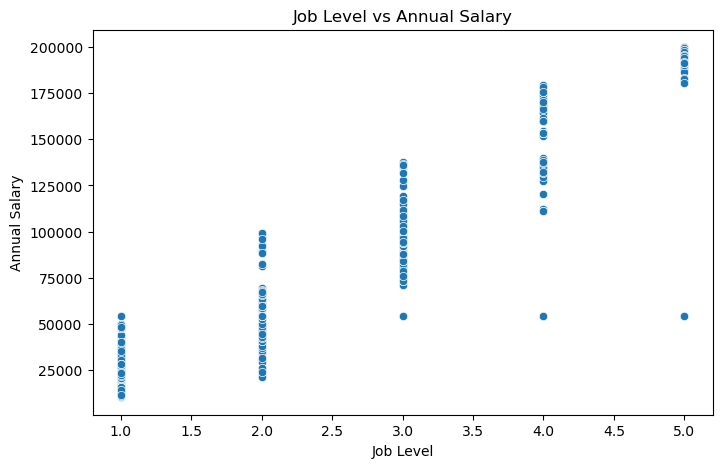

In [11]:
# Job Level y Annual Salary (correlación de 0.86)  # hacer con otro tipo de grafico

# Este gráfico de dispersión mostrará claramente cómo el nivel de trabajo se relaciona con el salario anual.


plt.figure(figsize=(8, 5))
sns.scatterplot(x='job_level', y='annual_salary', data=df)
plt.title('Job Level vs Annual Salary')
plt.xlabel('Job Level')
plt.ylabel('Annual Salary');

Esta gráfica muestra que existe una relación clara y positiva entre el nivel de trabajo y el salario anual. A medida que aumenta el `job_level`, los empleados tienden a tener un mayor salario, lo cual es coherente con una estructura organizacional donde las posiciones más altas reciben mayor remuneración. Además, se observa cierta variabilidad salarial dentro de algunos niveles, especialmente en los intermedios, lo que podría estar relacionado con la antigüedad, bonificaciones o negociaciones individuales.


### Jerarquía del Puesto de Trabajo según Años Trabajados en Total

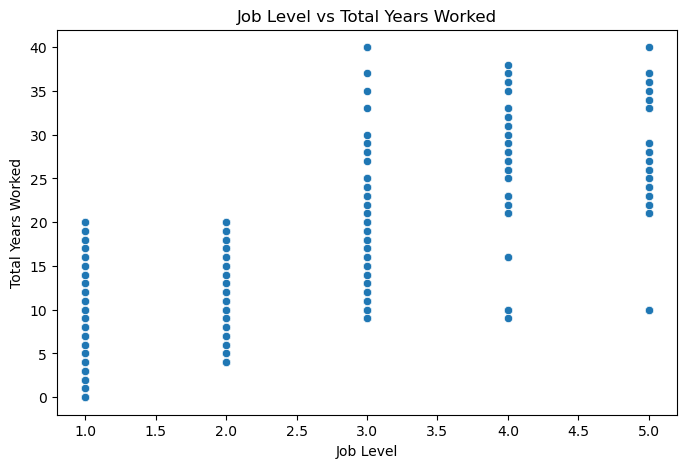

In [12]:
# Job Level y Total Years Worked (correlación de 0.56)
# Otro gráfico de dispersión para ver cómo el nivel de trabajo se asocia con los años trabajados en total.


plt.figure(figsize=(8, 5))
sns.scatterplot(x='job_level', y='total_years_worked', data=df)
plt.title('Job Level vs Total Years Worked')
plt.xlabel('Job Level')
plt.ylabel('Total Years Worked');

La gráfica muestra una tendencia general positiva: a medida que los empleados han trabajado más años en total a lo largo de su carrera, tienden a ocupar niveles más altos en la empresa. Sin embargo, la dispersión dentro de cada nivel sugiere que el `job_level` no depende únicamente de la experiencia acumulada, sino que tambien pueden influir otros factores como las habilidades, la formacion o la trayectoria interna en la organizacion.


### Jerarquía del Puesto de Trabajo según Año de Nacimiento

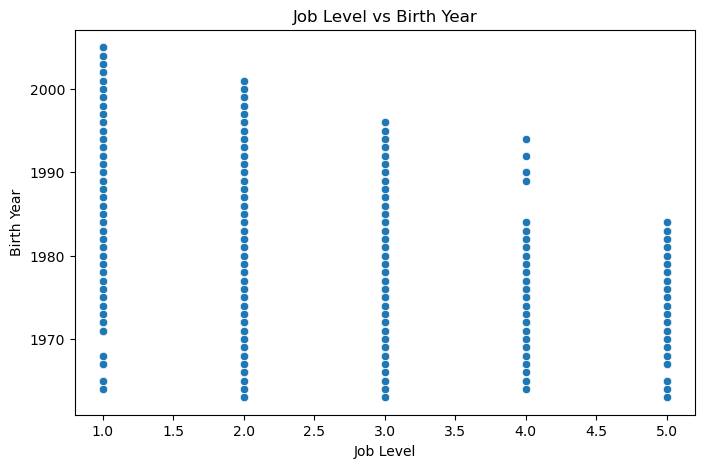

In [13]:
# Job Level y Birth Year (correlación de -0.49)
#En este caso, la correlación es negativa, por lo que espero que el gráfico muestre una tendencia descendente.

plt.figure(figsize=(8, 5))
sns.scatterplot(x='job_level', y='birth_year', data=df)
plt.title('Job Level vs Birth Year')
plt.xlabel('Job Level')
plt.ylabel('Birth Year');

Esta gráfica muestra una relación inversa clara: los empleados con niveles de trabajo más altos suelen haber nacido en años anteriores, es decir, son mayores. Esto es coherente con lo que se espera en una organización donde la experiencia y los años de trayectoria influyen en la posición que se ocupa. No obstante, también se pueden observar casos puntuales de empleados jóvenes en niveles altos, lo cual podria deberse a promociones aceleradas o talentos excepcionales.


### Jerarquía del Puesto de Trabajo según Años con mismo Gerente

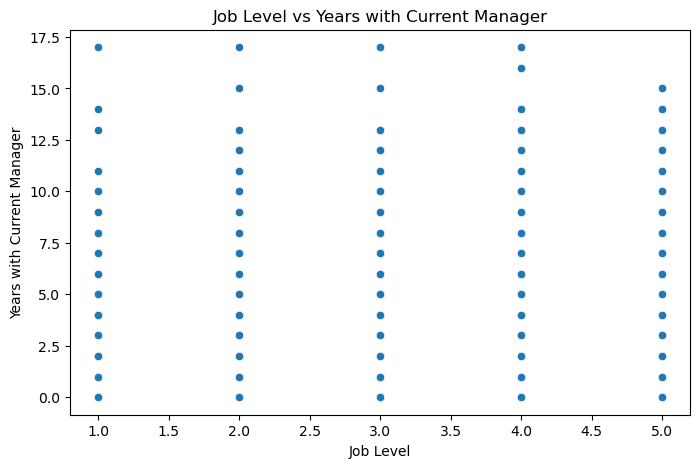

In [14]:
#  Job Level y Years with Current Manager (correlación de 0.37)
# Este gráfico ayuda a ver si hay una relación moderada entre los años con el gerente actual y el nivel de trabajo

plt.figure(figsize=(8, 5))
sns.scatterplot(x='job_level', y='years_with_current_manager', data=df)
plt.title('Job Level vs Years with Current Manager')
plt.xlabel('Job Level')
plt.ylabel('Years with Current Manager');

Se observa una leve tendencia ascendente: a medida que aumenta el nivel de trabajo, los empleados tienden a haber trabajado durante más tiempo con su manager actual. Aunque la relación no es muy fuerte, podría reflejar cierta estabilidad laboral asociada a puestos de mayor responsabilidad, o una mayor retención en equipos de trabajo consolidados. Sin embargo, la dispersión sugiere que esta no es una regla general y pueden existir múltiples trayectorias dentro de la organización.


### Jerarquía del Puesto de Trabajo según Años Trabajados en en la empresa

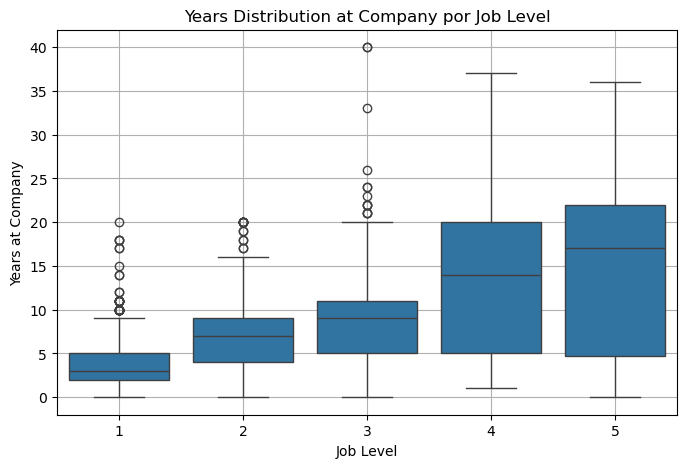

In [15]:
# Job Level y Years at Company (correlación de 0.48)
# Otro gráfico de dispersión para ver si los empleados con más antigüedad en la empresa tienen un nivel de trabajo más alto.

plt.figure(figsize=(8, 5))
sns.boxplot(x='job_level', y='years_at_company', data=df)
plt.title('Years Distribution at Company por Job Level')
plt.xlabel('Job Level')
plt.ylabel('Years at Company')
plt.grid(True) # para que saque las lineas de cuadricula

Este boxplot permite observar cómo varía la antigüedad en la empresa en función del nivel de trabajo. Se aprecia una tendencia clara: los empleados con `job_level` más alto suelen tener más años en la empresa. Además, la dispersión de los datos dentro de cada nivel indica que existen trayectorias diversas, con algunos empleados que alcanzan niveles superiores en menos tiempo, mientras que otros permanecen más años en un mismo nivel.


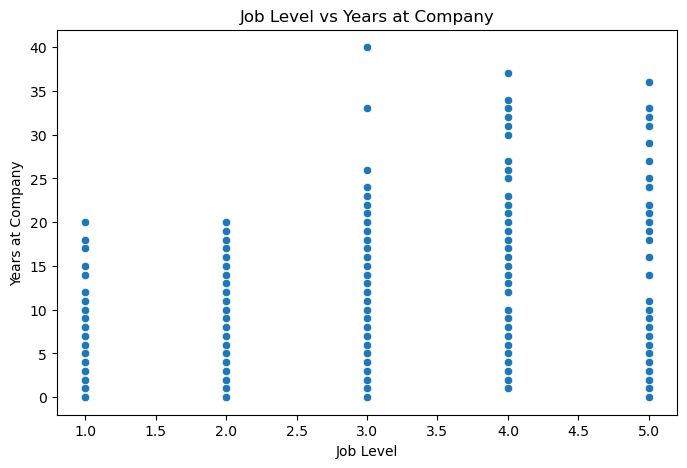

In [16]:
# Misma que anterior pero con scatterplot.

plt.figure(figsize=(8, 5))
sns.scatterplot(x='job_level', y='years_at_company', data=df)
plt.title('Job Level vs Years at Company')
plt.xlabel('Job Level')
plt.ylabel('Years at Company');

#### 📉 Correlaciones con `years_at_company`

1. **Years at Company y Annual Salary (correlación: 0.41):**  
   Relación moderada. Empleados con más años en la empresa tienden a tener mejores salarios.

2. **Years at Company y Total Years Worked (correlación: 0.47):**  
   Correlación moderada positiva. La antigüedad en la empresa refleja también una carrera profesional más larga.

3. **Years at Company y Birth Year (correlación: -0.25):**  
   Correlación negativa débil. Empleados más jóvenes tienden a llevar menos tiempo en la empresa.

4. **Years at Company y Years with Current Manager (correlación: 0.76):**  
   Correlación fuerte positiva. Quienes han estado más tiempo en la empresa suelen tener relaciones laborales más largas con su manager actual.

### Años Trabajados en en la empresa y Salario Anual

Text(0, 0.5, 'Annual Salary')

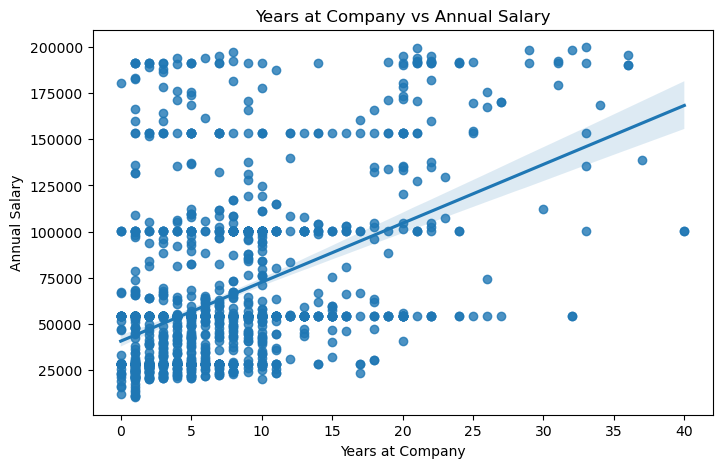

In [17]:
# Gráfico de dispersión entre Years at Company y Annual Salary

plt.figure(figsize=(8, 5))
sns.regplot(x='years_at_company', y='annual_salary', data=df)
plt.title('Years at Company vs Annual Salary')
plt.xlabel('Years at Company')
plt.ylabel('Annual Salary')

Esta gráfica incluye una línea de regresión que muestra una leve relación positiva entre la antigüedad en la empresa y el salario anual. Aunque existe una tendencia general de que los empleados con más años en la organización ganan más, la dispersión indica que esta relación no es determinante. Factores como el cargo, las promociones, la formación o acuerdos individuales pueden influir significativamente en la retribución económica.


### Años Trabajados en en la empresa y Años Trabajados en Total

Text(0, 0.5, 'Total Years Worked')

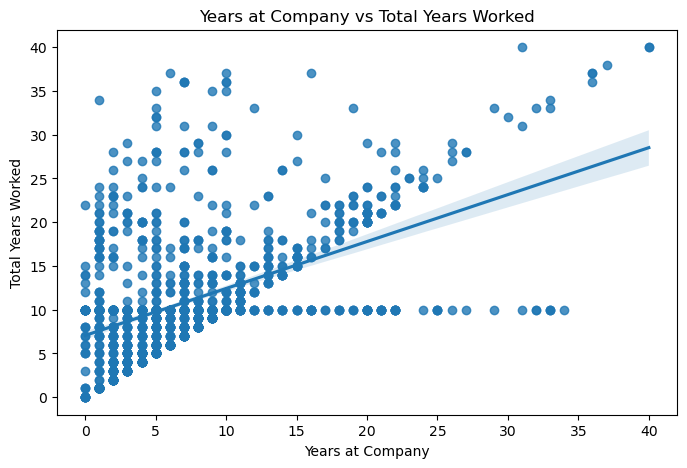

In [18]:
# Gráfico de dispersión entre Years at Company y Total Years Worked

plt.figure(figsize=(8, 5))
sns.regplot(x='years_at_company', y='total_years_worked', data=df)
plt.title('Years at Company vs Total Years Worked')
plt.xlabel('Years at Company')
plt.ylabel('Total Years Worked')


Este gráfico muestra una relación lógica y positiva: los empleados que llevan más tiempo en la empresa también suelen tener mayor experiencia laboral acumulada. La línea de regresión indica una tendencia clara, aunque existen casos de empleados cuya experiencia previa fuera de la empresa es significativa. También se identifican personas cuya carrera se ha desarrollado casi por completo dentro de esta organización.


### Comparación Años en la Empresa y Años de Nacimiento

Text(0.5, 0, 'Birth Year')

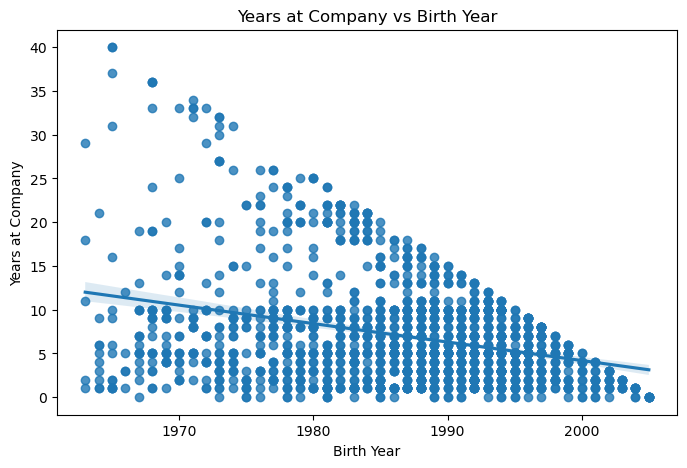

In [19]:
# Gráfico de dispersión entre Years at Company y Birth Year

plt.figure(figsize=(8, 5))
sns.regplot(y='years_at_company', x='birth_year', data=df)
plt.title('Years at Company vs Birth Year')
plt.ylabel('Years at Company')
plt.xlabel('Birth Year')

**Relación entre Birth Year y Years at Company**

Este gráfico revela una relación inversa entre el año de nacimiento y la antigüedad en la empresa: los empleados más jóvenes tienden a haber pasado menos tiempo en la organización. Aunque esta tendencia es esperada, también se observan excepciones, lo que sugiere que algunos empleados han tenido una trayectoria más larga en la empresa pese a ser relativamente jóvenes.


### Comparación Años en la Empresa y con mismo Gerente


Text(0, 0.5, 'Years with Current Manager')

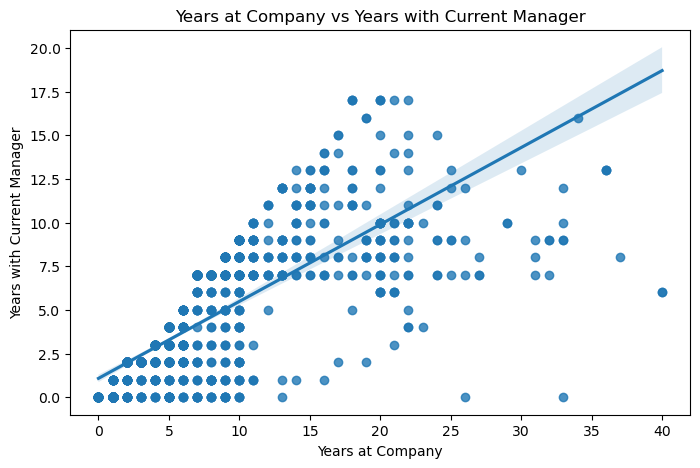

In [20]:
# Gráfico de dispersión entre Years at Company y Years with Current Manager

plt.figure(figsize=(8, 5))
sns.regplot(x='years_at_company', y='years_with_current_manager', data=df)
plt.title('Years at Company vs Years with Current Manager')
plt.xlabel('Years at Company')
plt.ylabel('Years with Current Manager')

Esta gráfica muestra una relación positiva clara: los empleados que llevan más tiempo en la empresa tienden a haber trabajado más años con su actual manager. Sin embargo, también se observan casos de personas con mucha antigüedad y poco tiempo con su actual superior, lo que podría indicar cambios recientes en la estructura organizativa. En general, esta relación puede dar pistas sobre la estabilidad en los equipos y la rotación de managers dentro de la empresa.



Estas correlaciones, aunque no se centran directamente en la variable `employee_turnover`, **son fundamentales para comprender los factores que podrían influir en la permanencia y desarrollo de los empleados** dentro de la organización.

## Resumen de Análisis de la Matriz de Correlación

🔻 **Correlaciones más fuertes (+0.5 o más)**

1. "annual_salary" y "job_level"(0.88): Cuanto más alto es el nivel del puesto, mayor es el salario. Tiene lógica pues los ascensos llevan a mejores sueldos.
2. "years_at_company" y "years_with_current_manager" (0.76):  Si un empleado lleva más tiempo en la empresa, también ha estado con su gerente por más tiempo. Indica estabilidad en los equipos de trabajo.
3. "total_years_worked" y "years_at_company" (0.52): Los empleados que han trabajado más años en otras empresas también llevan más tiempo en la empresa actual.
4. "years_at_company" y "job_level" (0.53): Los empleados con más años en la empresa tienden a estar en niveles laborales más altos.

🔻 **Correlaciones negativas fuertes (-0.5 o menos)**

1. "birth_year" está fuertemente correlacionado de manera negativa con total_years_worked (-0.55) y annual_salary (-0.56).** Esto sugiere que cuanto más joven es un empleado, menos años ha trabajado en otras empresas y tienen salarios más bajos. 
2. "job_level" y "birth_year" (-0.51): Los empleados más jóvenes suelen estar en niveles laborales más bajos.

🔻 **Correlaciones moderadas (0.2 a 0.5)**

1. "years_at_company" y "annual_salary" (0.47): Cuanto menos tiempo en la empresa, menor es el salario. La antigüedad es recompensada.
2. "years_at_company" y "birth_year" (-0.31): Cuanto menos años lleva en la empresa más joven es el empleado.
3. "num_companies_worked" tiene una relación positiva con "total_years_worked" (0.21), lo que sugiere que las personas con más experiencia laboral han trabajado en más número de empresas.
3. "education_level" tiene una correlación algo moderada con "total_years_worked" (0.12), pero una correlación negativa con "birth_year" (-0.20), lo que indica que los empleados mayores pueden haber tenido menos nivel educativo en promedio.


## 📊 Análisis Descriptivo Exploratorio de Variables Numéricas

Además de las correlaciones más significativas, hemos explorado visualmente otras variables que, si bien no presentan relaciones fuertes, pueden ofrecer insights interesantes sobre el comportamiento de los empleados y posibles patrones ocultos.


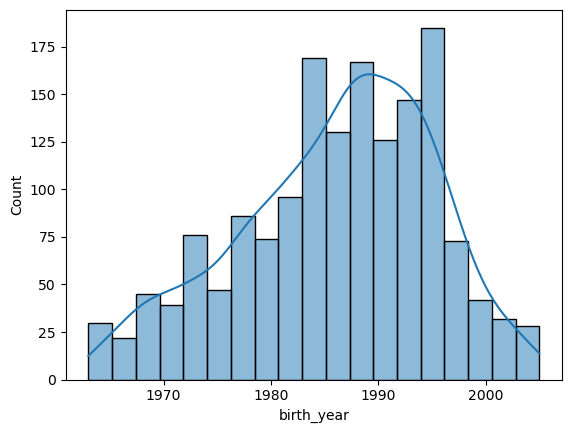

In [21]:
# Histograma histplot de una columna numérica (por ejemplo, 'birth_year')

sns.histplot(df['birth_year'], kde=True); # cruzar con employe_turn_over y eliminar si es interesante

**Distribución del Año de Nacimiento del Personal**

El histograma muestra la distribución de los años de nacimiento del personal. Se observa que la mayoría de los empleados nació entre 1986-1996, lo que indica que la plantilla está compuesta principalmente por personas nacidas en esa franja temporal. La curva KDE refuerza esta tendencia y permite visualizar la forma general de la distribución, mostrando si existe concentración en determinados tramos de edad.


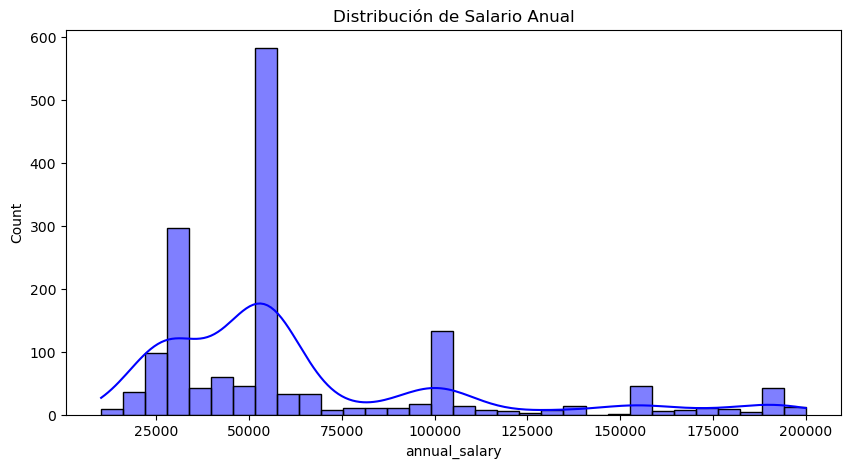

In [22]:
# Histplot para 'annual_salary'

plt.figure(figsize=(10, 5)) # Establezco el tamaño de la figura del grafico, en este caso 10 unid. de ancho por 5 de alto
sns.histplot(df['annual_salary'], kde=True, color='blue')  #kde=Tru para agregar la curva de densidad(representacion de la densidad)
plt.title('Distribución de Salario Anual'); 

# El histograma nos muestra cómo se distribuyen los salarios anuales. La curva KDE ayuda a entender mejor la forma de la distribución,
#  ya que suaviza la información del histograma. Esto es útil para identificar si los datos están sesgados, distribuidos normalmente 
# o si hay picos que indican algo interesante (como valores más concentrados en un rango de salarios).


**Distribución de Salario Anual (Histograma + KDE)**

La distribución de salarios en la empresa muestra una clara concentración en torno a los 55.000, siendo este el rango más frecuente. También se observa un segundo grupo más reducido de empleados con salarios alrededor de los 100.000, posiblemente asociados a puestos de mayor responsabilidad o seniority. La presencia de varios valores más altos, aunque poco frecuentes, genera una cola hacia la derecha, lo que indica una distribución asimétrica típica en organizaciones jerárquicas. Esta gráfica revela diferencias salariales significativas dentro del equipo.


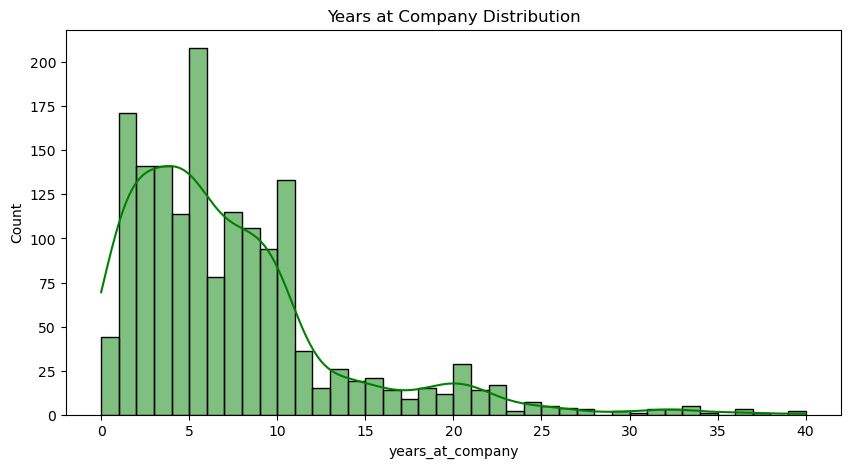

In [23]:
# Histplot para 'years_at_company'  # MANTENER

plt.figure(figsize=(10, 5))  # Establezco el tamaño de la figura del grafico, en este caso 10 unid. de ancho por 5 de alto
sns.histplot(df['years_at_company'], kde=True, color='green')  #kde=Tru para agregar la curva de densidad(representacion de la densidad)
plt.title('Years at Company Distribution');


# Lo que este gráfico enseña es la distribución de la antigüedad de los empleados en la empresa. 
# Si la distribución está sesgada hacia un valor más bajo o más alto, eso podría indicar algo interesante sobre la estabilidad laboral en la empresa.

**Distribución de Años en la Empresa**

La mayor parte de los empleados lleva entre 2 y 10 años en la organización, con un pico claro en torno a los 5 años de antigüedad. Aunque en menor cantidad, también existen perfiles con trayectorias mucho más largas, superando incluso los 20 o 30 años. Esta distribución sugiere una plantilla mayoritariamente consolidada, con un nivel medio de permanencia elevado, pero también con casos de alta fidelización que aportan experiencia a largo plazo. La asimetría de la curva refuerza esta visión de antigüedad moderada con una base de empleados veteranos.


Text(0.5, 1.0, 'Annual Salary Boxplot')

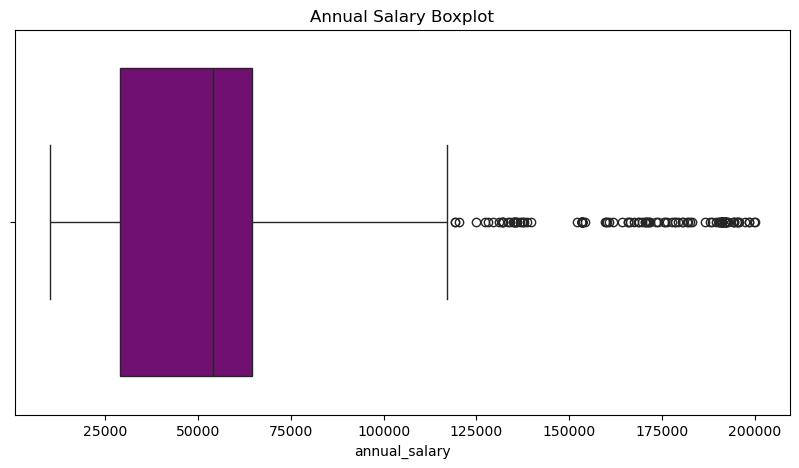

In [24]:
# DIAGRAMA DE CAJA: util para ver la distribucion de los datos, la mediana, los cuartiles y los valores atipicos.
# Boxplot para 'annual_salary':  duplicada, eliminar

plt.figure(figsize=(10, 5))  # Establezco el tamaño de la figura del grafico, en este caso 10 unid. de ancho por 5 de alto
sns.boxplot(x=df['annual_salary'], color='purple')
plt.title('Annual Salary Boxplot')

# El boxplot es una representación visual que permite ver varios aspectos de la distribución de los salarios:
    # La caja (box) muestra el rango intercuartil (Q1 y Q3).
    # La línea dentro de la caja es la mediana.
    # Las líneas horizontales (bigotes) muestran el rango de los datos, hasta cierto límite (que se suele establecer por defecto en 1.5 veces el rango intercuartil).
    # Los puntos fuera de los bigotes son considerados outliers o valores atípicos, y representan salarios extremadamente altos o bajos.

Este boxplot muestra que el salario anual de la mayoría de los empleados se concentra entre aproximadamente 35.000 y 75.000 euros, con una mediana cercana a los 60.000. Sin embargo, se observa una gran cantidad de valores atípicos (outliers) a partir de los 125.000, que podrían estar asociados a perfiles directivos o con condiciones especiales. Esta dispersión refleja una **estructura salarial desigual**, habitual en organizaciones jerarquizadas donde las responsabilidades y funciones están muy diferenciadas.


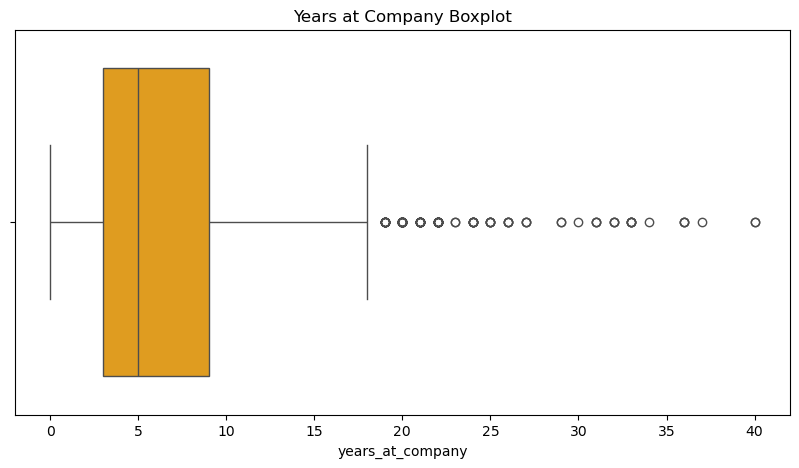

In [25]:
# Boxplot para 'years_at_company' # quitar esta y dejar la de las barras verdes

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['years_at_company'], color='orange')
plt.title('Years at Company Boxplot');

**Boxplot de Años en la Empresa**

La antigüedad de los empleados muestra una mediana cercana a los 6 años, con el **50% de la plantilla agrupado entre los 3 y los 10 años**. A partir de los 20 años se observan múltiples valores atípicos, correspondientes a trabajadores con trayectorias muy prolongadas en la organización. Estos casos, aunque menos frecuentes, reflejan un alto grado de fidelización y experiencia acumulada dentro de la empresa.


# 2. Variables Categóricas

## 2.1.- 🔍 Análisis Descriptivo
**Vemos interesante a continuación estudiar la información sobre las condiciones laborales de los empleados teniendo en cuenta las variables numéricas categóricas (clasificación de datos en niveles) y las numéricas ya estudiadas en primera instancia.**
### **En concreto, nos centraremos en las relaciones establecidas con las Variables Nominales cuya información también es muy valiosa:**

In [26]:
df_categ = df.select_dtypes(include = 'object')

In [27]:
df_categ.describe().T

,count,unique,top,freq
employee_turnover,1614,2,no,1355
business_travel_frequency,1614,4,unknown,772
gender,1614,2,male,971
marital_status,1614,4,unknown,651
overtime_hours,1614,3,no,682
standard_work_hours,1614,3,part_time,888
remote_work,1614,2,yes,1000


## 📊 2. 1.- Análisis Descriptivo de Variables Categóricas

A continuación se describen las principales variables categóricas del dataset, su distribución y posibles implicaciones para el análisis de la rotación de empleados.

---

### 🧑‍💼 Employee Turnover (Rotación de empleados)

- El dataset contiene **1.614 empleados**.
- De ellos, **1.355 empleados no han renunciado** (`"no"`) y **259 sí lo han hecho** (`"yes"`).
- ➤ Existe un **desbalance de clases**, lo que podría afectar futuros modelos predictivos. Sería recomendable aplicar técnicas como **oversampling** o **undersampling** si se usa esta variable como variable objetivo.

---

### ✈️ Business Travel Frequency (Frecuencia de viajes laborales)

- La categoría más frecuente es **"unknown"** con **772 casos**.
- ➤ La alta proporción de valores desconocidos puede **afectar la calidad del análisis**.
- Se recomienda revisar si los `"unknown"` pueden **imputarse o eliminarse**, según el contexto.

---

### 🚻 Gender (Género)

- Predominan los hombres (**971 empleados**) frente a **643 mujeres**.
- ➤ Sería interesante analizar si hay diferencias en la **rotación de empleados según género**.

---

### 💍 Marital Status (Estado civil)

- Hay **651 empleados con valor "unknown"** en esta variable.
- ➤ Nuevamente se detecta **problema de calidad de datos**.
- Si se considera una variable relevante, podría aplicarse alguna estrategia de **imputación** o descartarla.

---

### ⏱️ Overtime Hours (Horas extra)

- La mayoría de empleados **no realiza horas extra** (**682 casos**).
- ➤ Podría investigarse si hay una **relación entre hacer horas extra y la rotación laboral**.

---

### 🕒 Standard Work Hours (Tipo de jornada)

- **888 empleados trabajan a tiempo parcial**.
- ➤ Este factor podría influir en la **satisfacción y permanencia** dentro de la empresa.

---

### 🏠 Remote Work (Trabajo remoto)

- **1.000 empleados trabajan en remoto**, lo que representa **la mayoría de la plantilla**.
- ➤ Sería útil explorar si el **trabajo remoto está asociado a una menor rotación**, mayor satisfacción o retención de talento.

---



**Resumen de los datos que tenemos hasta el momento:**
La variable que más nos interesa es "employee_turnover" ya que es la decisión de los empleados de rotación o abandono de la empresa.
En total hay 1614 empleados, siendo 1355 los que no renuncian a su puesto mientras que 259 de ellos sí lo han hecho.

 Esto sugiere un desbalance en los datos, lo que podría afectar modelos predictivos (sería importante considerar técnicas como oversampling o undersampling). Puede ser necesario balancear los datos para mejorar la capacidad del modelo de identificar correctamente los casos de rotación.

       A. Análisis Bivariado


## 🔍 Preguntas de Análisis: Rotación vs. Variables Categóricas

A partir de la descripción anterior, se proponen algunas preguntas clave para analizar si existe relación entre la rotación de empleados (`employee_turnover`) y diferentes variables categóricas:

---

### 👩‍🦰👨 Gender (Género) vs. Employee Turnover

> ¿Hay diferencias significativas en la rotación entre hombres y mujeres?

---

### 🏠 Remote Work (Trabajo Remoto) vs. Employee Turnover

> ¿Los empleados que trabajan en remoto presentan menor rotación que los presenciales?

---

### ⏱️ Overtime Hours (Horas Extra) vs. Employee Turnover

> ¿Los empleados que realizan horas extra tienen más probabilidades de renunciar?

---

### ✈️ Business Travel Frequency (Frecuencia de Viajes) vs. Employee Turnover

> ¿Una mayor frecuencia de viajes se asocia a una mayor rotación?

---

### 💍 Marital Status (Estado Civil) vs. Employee Turnover

> ¿Influye el estado civil en la permanencia en la empresa?

---

Estas preguntas guían la exploración cruzada de variables categóricas con la variable objetivo (`employee_turnover`) y permiten construir hipótesis sobre los factores que podrían influir en la decisión de abandonar o no la empresa.


## 2.2.- 📊 Análisis Diagnóstico Categóricas

        B. Visualización del Análisis

### Rotación de Empleados según su Género

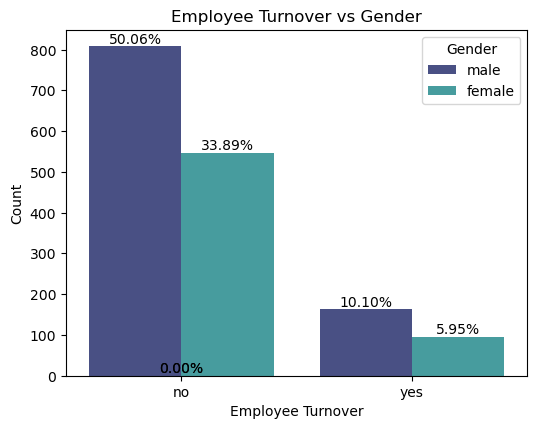

In [28]:
# Creamos un gráfico de barras para observar la distribución de las variables categóricas
plt.figure(figsize=(15, 8))
ax = plt.subplot(2, 3, 1)  # Asignamos el subplot a la variable ax
sns.countplot(x='employee_turnover', 
              hue='gender', 
              palette="mako",
              data=df_categ, 
              ax=ax) 
ax.set_title('Employee Turnover vs Gender')
plt.xlabel("Employee Turnover")
plt.ylabel("Count")

# Añadimos etiquetas a los ejes
plt.legend(title='Gender')  # Añadimos leyenda para el hue
plt.tight_layout()  # Ajustamos el layout para evitar solapamientos

# añadimos porcentaje a las barras
total = df_categ['employee_turnover'].value_counts()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total.sum():.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

Resultados:
- La rotación es más alta entre los hombres (10,10 %) que entre las mujeres (5,95 %). En general parece que hombres y mujeres tienen niveles de rotación similares, aunque hay más hombres en la muestra.

- Si no supiéramos que el 60 % son hombres esto podría indicar que los hombres son más propensos a dejar la empresa. Además, es importante considerar otros factores como el tipo de trabajo o la antigüedad.

- La gráfica muestra que la rotación afecta a ambos géneros, pero con una ligera predominancia en mujeres. Aunque las mujeres representan una mayor proporción de la plantilla, también son quienes más abandonan la empresa en términos absolutos. Para confirmar si existe una diferencia significativa en la rotación relativa (proporcionalmente), sería necesario analizar los porcentajes de salida por género.


### Rotación de Empleados según su Frecuencia de Viajes

En el siguiente gráfico de barras hemos relacionado las variables de rotación y frecuencia de viajes laborales para ver si existe una tendencia a rotar por frecuencia de viajes laborales.

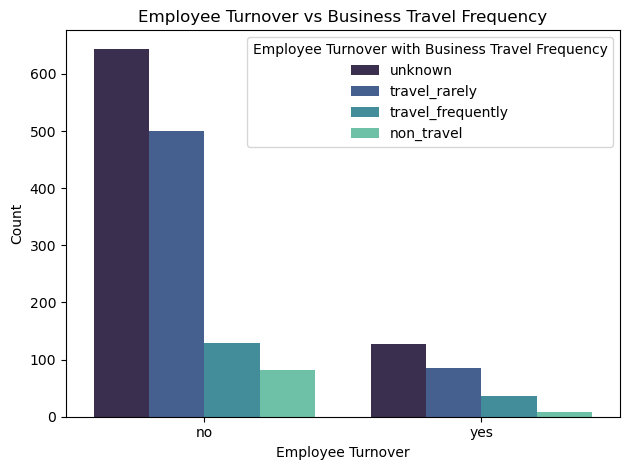

In [29]:
sns.countplot(x='employee_turnover',
              hue='business_travel_frequency',
              palette="mako",
              data=df_categ
              )
plt.title('Employee Turnover vs Business Travel Frequency')
plt.xlabel("Employee Turnover")
plt.ylabel("Count")
plt.legend(title='Employee Turnover with Business Travel Frequency')  # Añadimos leyenda para el hue
plt.tight_layout()  # Ajustamos el layout para evitar solapamientos

Resultados:
- Los empleados que viajan con más frecuencia parecen tener mayor rotación que los que no viajan.

- Hay muchos valores "unknown", lo cual dificulta el análisis. Los datos no nos ofrecen una conclusión clara, pues tenemos un sesgo de 48 % datos desconocidos y sólo un 10 % viaja con frecuencia.

### Rotación de Empleados según su Estado Civil

En el siguiente gráfico de barras hemos relacionado las variables de rotación y estado civil para ver si las responsabilidades maritales afectan a la rotación.

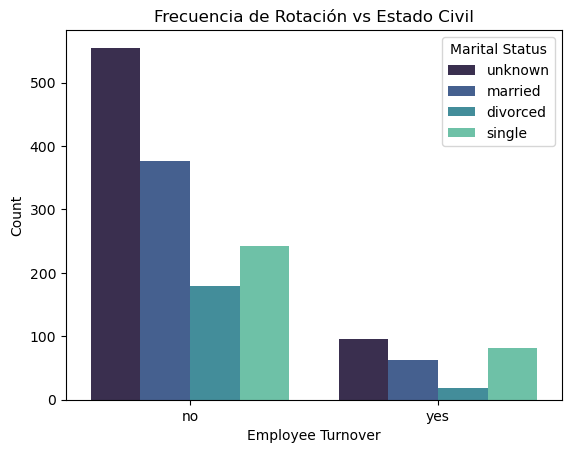

In [30]:
sns.countplot(x='employee_turnover',
              hue = 'marital_status',
              palette="mako",
              data=df_categ
              )
 # Añadimod nombre a hue 
plt.legend(title="Marital Status", loc='upper right')
# Cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Employee Turnover")
plt.ylabel("Count")
plt.title("Frecuencia de Rotación vs Estado Civil")
plt.show()

Resultados:
- En esta visualización destacamos que hay más casados que se quedan que solteros, es decir, en el grupo de los que abandonan sus puestos hay más solteros que casados o divorciados y, sin embargo, hay más casados que deciden no abandonar su estabilidad laboral.
- Hay muchos valores "unknown".
- En resumen, parece que los empleados solteros tienen más rotación que los casados/divorciados.

### Relación entre Jerarquía Laboral y Estado Civil

El objetivo es observar la correlación entre tales factores para llegar a conclusiones más concisas.

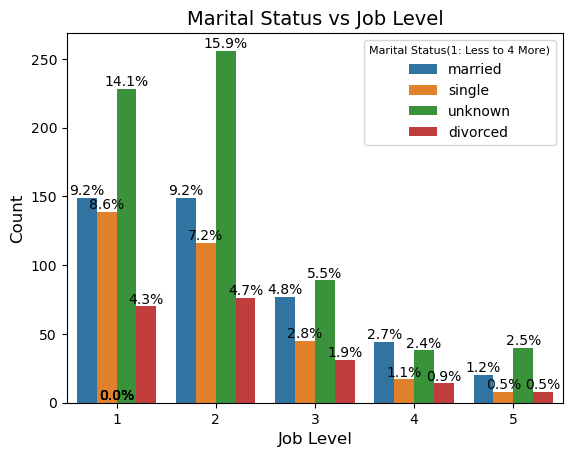

In [31]:
# Creamos el gráfico de barras para las variables de Jornada Laboral y Satisfacción Laboral
ax = sns.countplot(x='job_level', hue='marital_status', data=df)

# Añadimos etiquetas a los ejes
ax.set_xlabel('Job Level', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Añadimos título a la leyenda
ax.legend(title='Marital Status'
'(1: Less to 4 More)', title_fontsize=8)

# Calculamos y añadimos porcentajes en cada barra
total_counts = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_counts:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Mostramos el gráfico
plt.title('Marital Status vs Job Level', fontsize=14)
plt.show()

### Relación entre Estado Civil y Conciliación
Queremos saber si cuando los empleados están casados tienen un desequilibrio entre trabajo y vida personal.

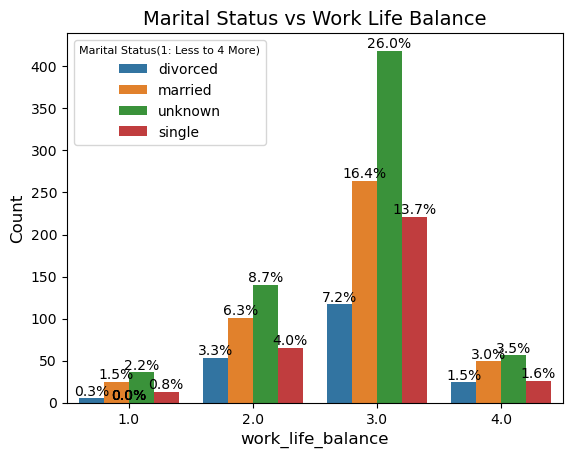

In [56]:
# Creamos el gráfico de barras para las variables de Jornada Laboral y Satisfacción Laboral
ax = sns.countplot(x='work_life_balance', hue='marital_status', data=df)

# Añadimos etiquetas a los ejes
ax.set_xlabel('work_life_balance', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Añadimos título a la leyenda
ax.legend(title='Marital Status'
'(1: Less to 4 More)', title_fontsize=8)

# Calculamos y añadimos porcentajes en cada barra
total_counts = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_counts:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Mostramos el gráfico
plt.title('Marital Status vs Work Life Balance', fontsize=14)
plt.show()

In [59]:
df_categ["marital_status"].value_counts()

marital_status
unknown     651
married     439
single      325
divorced    199
Name: count, dtype: int64

### Rotación de Empleados según las Horas Extras

Analizar la rotación de empleados en función de las horas extras es clave para entender los factores que influyen en la decisión de renunciar.

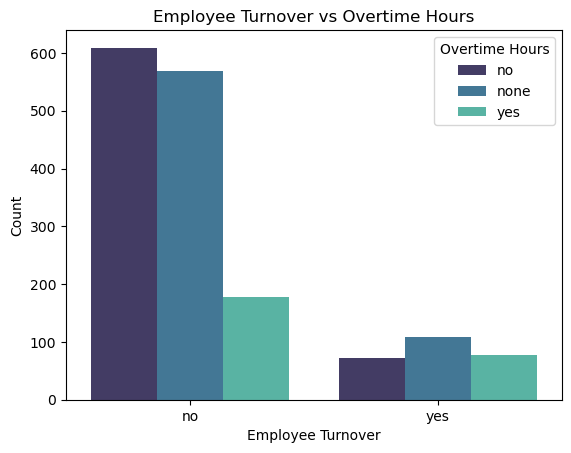

In [32]:
sns.countplot(x='employee_turnover',
              hue = 'overtime_hours',
              palette="mako",
              data=df_categ
              )

plt.legend(title="Overtime Hours", loc='upper right')
plt.xlabel("Employee Turnover")
plt.ylabel("Count")
plt.title("Employee Turnover vs Overtime Hours")
plt.show()

Resultados:
- Este gráfico de barras nos muestra un dato importante en el análisis: los empleados que sí hacen horas extras tienden a abandonar la empresa.

    Hay más empleados que no hacen horas extra, pero los que sí hacen parecen tener una rotación mayor.

    Esto sugiere que las horas extra podrían estar relacionadas con el desgaste y la rotación.
    
- Hay que valorar el sesgo de datos "none" nulos para llegar a unas conclusiones, puede que una variable externa esté afectando tanto a la variable dependiente (rotación) como a la independiente (horas extras), creando una falsa relación entre ellas.

### Rotación de Empleados en función del tipo de Jornada Laboral 

Analizar la rotación de empleados en función de la jornada laboral es crucial para comprender cómo el tiempo de trabajo impacta en la permanencia o salida de los empleados. Esta relación puede revelar factores clave que afectan la estabilidad laboral y la satisfacción de los trabajadores.

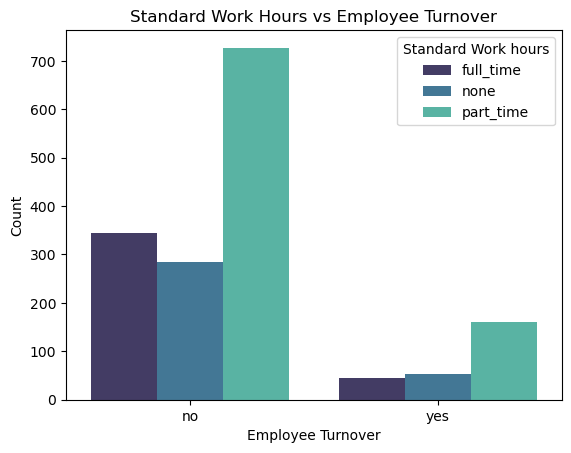

In [33]:
sns.countplot(x='employee_turnover',
              hue = 'standard_work_hours',
              palette="mako",
              data=df_categ
              )

plt.legend(title="Standard Work hours", loc='upper right')
plt.xlabel("Employee Turnover")
plt.ylabel("Count")
plt.title("Standard Work Hours vs Employee Turnover")
plt.show()

Resultados:
- En esta gráfica no encontramos información relevante para nuestras conclusiones puesto que el 55 % de los empleados trabajan a jornada parcial.
- Puede haber una distribución de datos sesgada debido a las respuestas nulas.

**Podemos observar que el tipo de jornada de trabajo no afecta a la rotación pero puede afectar a la satisfacción**

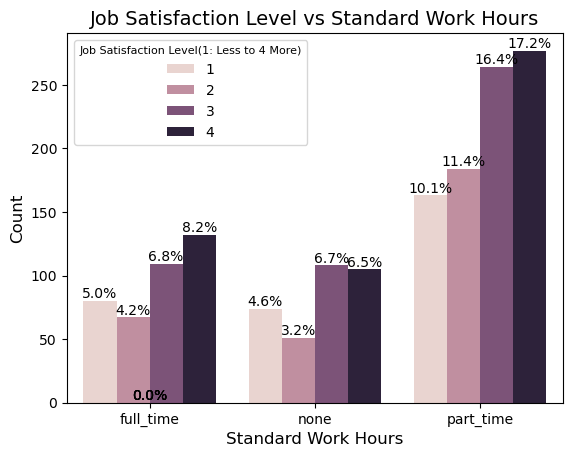

In [34]:
# Creamos el gráfico de barras para las variables de Jornada Laboral y Satisfacción Laboral
ax = sns.countplot(x='standard_work_hours', hue='job_satisfaction_level', data=df)

# Añadimos etiquetas a los ejes
ax.set_xlabel('Standard Work Hours', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Añadimos título a la leyenda
ax.legend(title='Job Satisfaction Level'
'(1: Less to 4 More)', title_fontsize=8)

# Calculamos y añadimos porcentajes en cada barra
total_counts = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_counts:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Mostramos el gráfico
plt.title('Job Satisfaction Level vs Standard Work Hours', fontsize=14)
plt.show()

Resultados: 
- Podemos observar que en la jornada completa "full_time" 
la satisfacción de los empleados tiende a ser más baja, pues hay más respuestas con satisfacción 1 que 2.

### Rotación de Empleados en función del Trabajo en Remoto

### Rotación de Empleados en Función de Tele-trabajo
En este gráfico de barras veremos si el trabajo en remoto (tele-trabajo) se relaciona directamente con la rotación de los empleados.

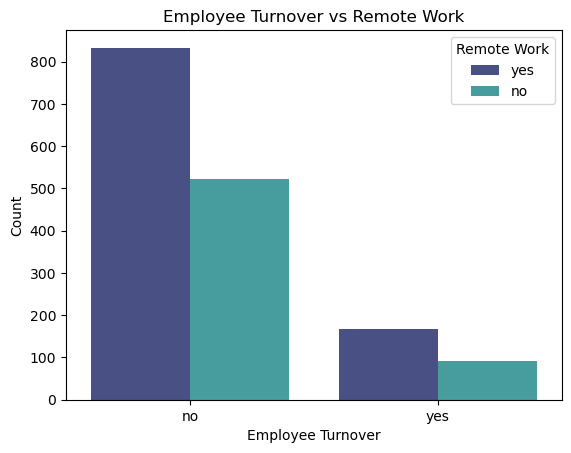

In [35]:
sns.countplot(x='employee_turnover',
              hue = 'remote_work',
              palette="mako",
              data=df_categ
              )

plt.legend(title="Remote Work", loc='upper right')
plt.xlabel("Employee Turnover")
plt.ylabel("Count")
plt.title("Employee Turnover vs Remote Work")
plt.show()

Resultados:
- Más del 60 % de los trabajadores trabajan desde su casa o a distancia, es coherente y representativo que abandonen más empleados que trabajan en remoto.

### Rotación de Empleados según Edad

Text(0.5, 0, 'Birth Year')

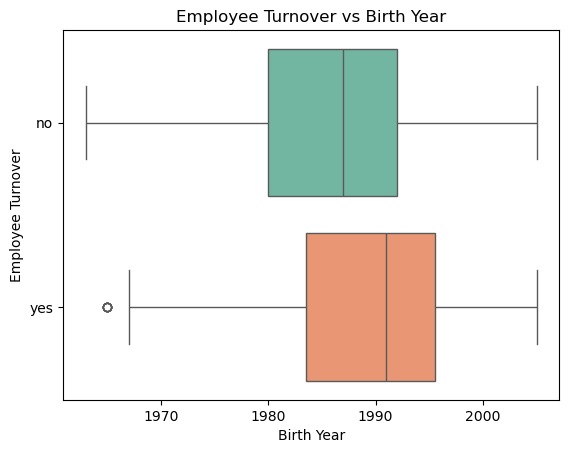

In [36]:
# Boxplot de 'employee_turnover' vs. 'birth_year'-> Ver si hay una edad promedio de rotación.

sns.boxplot(y='employee_turnover', x='birth_year', data=df, palette='Set2')  # palette= set" defino una paleta de colores suave y diferenciada por categorias.
plt.title('Employee Turnover vs Birth Year')
plt.ylabel('Employee Turnover')
plt.xlabel('Birth Year')

# los que se van de la empresa son mas jovenes.

El boxplot revela que los empleados que han renunciado a la empresa tienden a ser más jóvenes (nacidos en años más recientes), mientras que aquellos que permanecen muestran una mayor variabilidad en la edad. Esto sugiere que los perfiles más jóvenes son más propensos a abandonar la organización, posiblemente en busca de nuevas oportunidades, mayor crecimiento profesional o mejores condiciones. La edad, por tanto, podría ser un factor relevante a considerar en la retención del talento.


### Rotación según Antigüedad en Empresa

Text(0.5, 0, 'Years at Company')

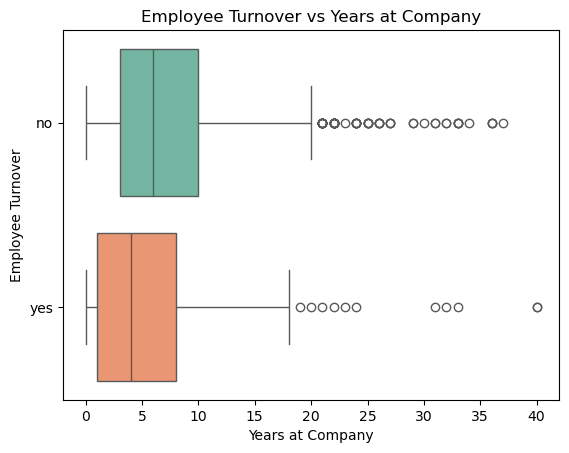

In [37]:
# Boxplot de 'employee_turnover' vs 'years_at_company' -> para ver si los empleados que tienen mas antigüedad en la empresa tienen menos 
# probabilidad de irse.


sns.boxplot(y='employee_turnover', x='years_at_company', data=df, palette='Set2')
plt.title('Employee Turnover vs Years at Company')
plt.ylabel('Employee Turnover')
plt.xlabel('Years at Company')

# Aquí estoy comparando los años de antigüedad de los empleados con respecto a si se han ido o no.

Este boxplot muestra una diferencia clara entre empleados que han renunciado y quienes permanecen en la empresa. Los que han dejado la organización tienden a tener menos años de antigüedad, mientras que quienes siguen en ella presentan trayectorias más largas. Esto sugiere que la antigüedad puede ser un factor relevante en la retención del personal: a mayor permanencia, menor probabilidad de rotación.


### Rotación de Empleados por Género

Text(0, 0.5, 'Count')

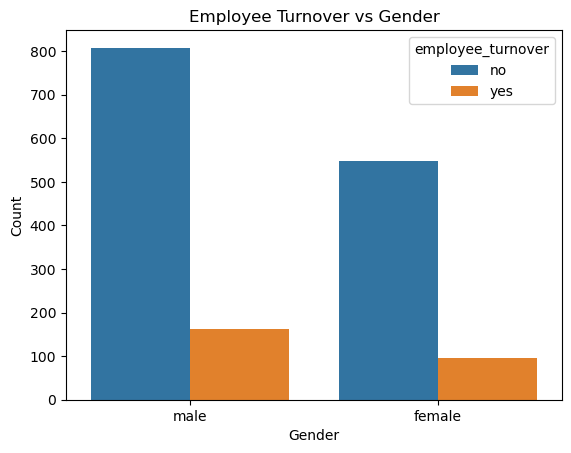

In [38]:
# Countplot de 'employee_turnover' por 'gender' -> ete grafico veo si la rotacion de empleados varia entre generos.

sns.countplot(x='gender', hue='employee_turnover', data=df)  # hue='employee_turnover' muestra las barras divididas por rotación (quienes se fueron y quienes se quedaron).
plt.title('Employee Turnover vs Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Esto me da una visualización comparativa de cuántos empleados de cada género se han ido y cuántos se han quedado
# la tiene sara, sacar porcentajes si se puede

Aunque en números absolutos hay más mujeres que han dejado la empresa, al calcular el porcentaje de rotación dentro de cada género observamos que:

- Por ejemplo, "la rotación femenina es del 17%, mientras que la masculina es del 14%"

Esto indica que la **rotación es ligeramente mayor entre mujeres**, lo que podría estar vinculado a factores estructurales, culturales o personales. Sería interesante investigar más a fondo si esta diferencia es estadísticamente significativa o responde a factores específicos dentro del entorno laboral.


### Rotación según Salario Anual**

Text(0.5, 0, 'Annual Salary')

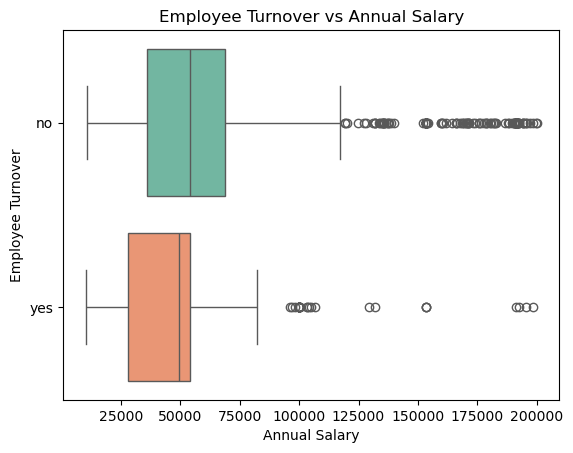

In [39]:
# Boxplot de 'employee_turnover' vs. 'annual_salary'

sns.boxplot(y='employee_turnover', x='annual_salary', data=df, palette = "Set2")
plt.title('Employee Turnover vs Annual Salary')
plt.ylabel('Employee Turnover')
plt.xlabel('Annual Salary')

# El boxplot me permitirá comparar los salarios de los empleados que se han ido con los que se han quedado:

# Si los empleados que se han ido tienen salarios significativamente más bajos o más altos que los empleados que se han quedado, esto puede ser un indicio de que el salario influye en la decisión de abandonar la empresa.
# También puedo ver si hay outliers (valores extremos) en los salarios, que pueden indicar casos especiales.


El análisis muestra que los empleados que han renunciado presentan, en general, un salario anual más bajo que aquellos que permanecen en la empresa. Además, el rango salarial en el grupo que se queda es más amplio, con presencia de sueldos significativamente más altos. Esto sugiere que el salario podría ser un factor influyente en la rotación: los empleados con retribuciones más bajas podrían estar menos satisfechos o encontrar más fácilmente oportunidades externas más atractivas.


## 🔍 Observaciones Relevantes a partir de los Gráficos

A continuación se resumen los hallazgos más relevantes obtenidos a partir de las visualizaciones realizadas, que permiten entender mejor los factores asociados a la rotación de empleados:

---

### 👩‍🦰👨 Género vs Rotación

Aunque hay más mujeres en la muestra total, la rotación relativa entre géneros es bastante similar. No se observan diferencias destacables en la proporción de hombres y mujeres que abandonan la empresa. Este resultado sugiere que **el género no parece ser un factor determinante en la rotación**.

---

### 🏠 Trabajo Remoto vs Rotación

La mayoría de los empleados trabajan en remoto. Al comparar con aquellos que trabajan de forma presencial, **la rotación no muestra grandes diferencias** entre ambos grupos. Esto indica que, en este caso, el **trabajo remoto no parece influir significativamente en la permanencia** de los empleados.

---

### ⏱️ Horas Extra vs Rotación

Si bien hay más empleados que no realizan horas extra, **la proporción de rotación es mayor entre quienes sí las hacen**. Este patrón sugiere que **las horas extra podrían estar relacionadas con mayor desgaste laboral**, lo que podría influir negativamente en la retención del talento.

---

### ✈️ Frecuencia de Viajes vs Rotación

Esta variable presenta una alta proporción de valores `"unknown"`, lo que limita su análisis. Sin embargo, dentro de los valores conocidos, se observa que **los empleados que viajan con más frecuencia tienden a abandonar más la empresa** que aquellos que no lo hacen. Esto podría estar vinculado al impacto que los viajes frecuentes tienen en el equilibrio vida-trabajo.

---

### 💍 Estado Civil vs Rotación

También en esta variable hay muchos valores desconocidos, pero entre los datos válidos se percibe que **los empleados solteros presentan una mayor tasa de rotación** que los casados o divorciados. Esto podría estar relacionado con distintos niveles de estabilidad o prioridades personales según la situación familiar.

---

### 🎂 Edad (Año de nacimiento) vs Rotación

El boxplot evidencia que los empleados que han renunciado tienden a ser más jóvenes, mientras que quienes permanecen en la empresa muestran una mayor variedad de edades. Esto sugiere que la **edad podría estar relacionada con la estabilidad laboral**, siendo los perfiles jóvenes más propensos a cambiar de empleo.

---

### 🏢 Años en la Empresa vs Rotación

La antigüedad en la empresa está claramente relacionada con la permanencia: **los empleados que se han marchado suelen tener menos años en la empresa**, mientras que quienes continúan han desarrollado trayectorias más largas. Esto confirma que **la fidelización suele aumentar con el tiempo**.

---

### 💰 Salario Anual vs Rotación

El análisis salarial muestra que **los empleados que han renunciado tienden a tener un salario anual más bajo** que aquellos que permanecen en la empresa. Además, quienes se quedan presentan una mayor dispersión salarial y presencia de sueldos elevados. Esto sugiere que **el salario puede ser un factor relevante en la retención**, y que las condiciones económicas más favorables podrían contribuir a reducir la rotación.

---

### 🧑‍🤝‍🧑 Género (Reforzado con gráfico adicional)

A través del gráfico comparativo, también se observa que tanto hombres como mujeres presentan niveles similares de rotación. Aunque el porcentaje de rotación podría ser ligeramente mayor entre mujeres, **la diferencia no es especialmente pronunciada**.

---

**Conclusión general:**  
Las variables más asociadas a la rotación parecen ser la **edad**, la **antigüedad en la empresa**, el **salario** y el hecho de **realizar horas extra**. Factores como el estado civil o la frecuencia de viajes podrían influir, aunque se ven limitados por la calidad de los datos. En cambio, el género y el trabajo remoto no parecen marcar una diferencia significativa en la rotación.


# Variables Categóricas Ordinales
## 🔍 3.1 Análisis Descriptivos

In [40]:
df.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

In [41]:
df_satisf = df[['environmental_satisfaction_level', 'job_involvement_level','job_satisfaction_level', 'work_life_balance']]

In [42]:
df_satisf.describe().T

,count,mean,std,min,25%,50%,75%,max
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.0,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.0,3.0,4.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.0,4.0,4.0
work_life_balance,1614.0,2.775713,0.681347,1.0,2.0,3.0,3.0,4.0


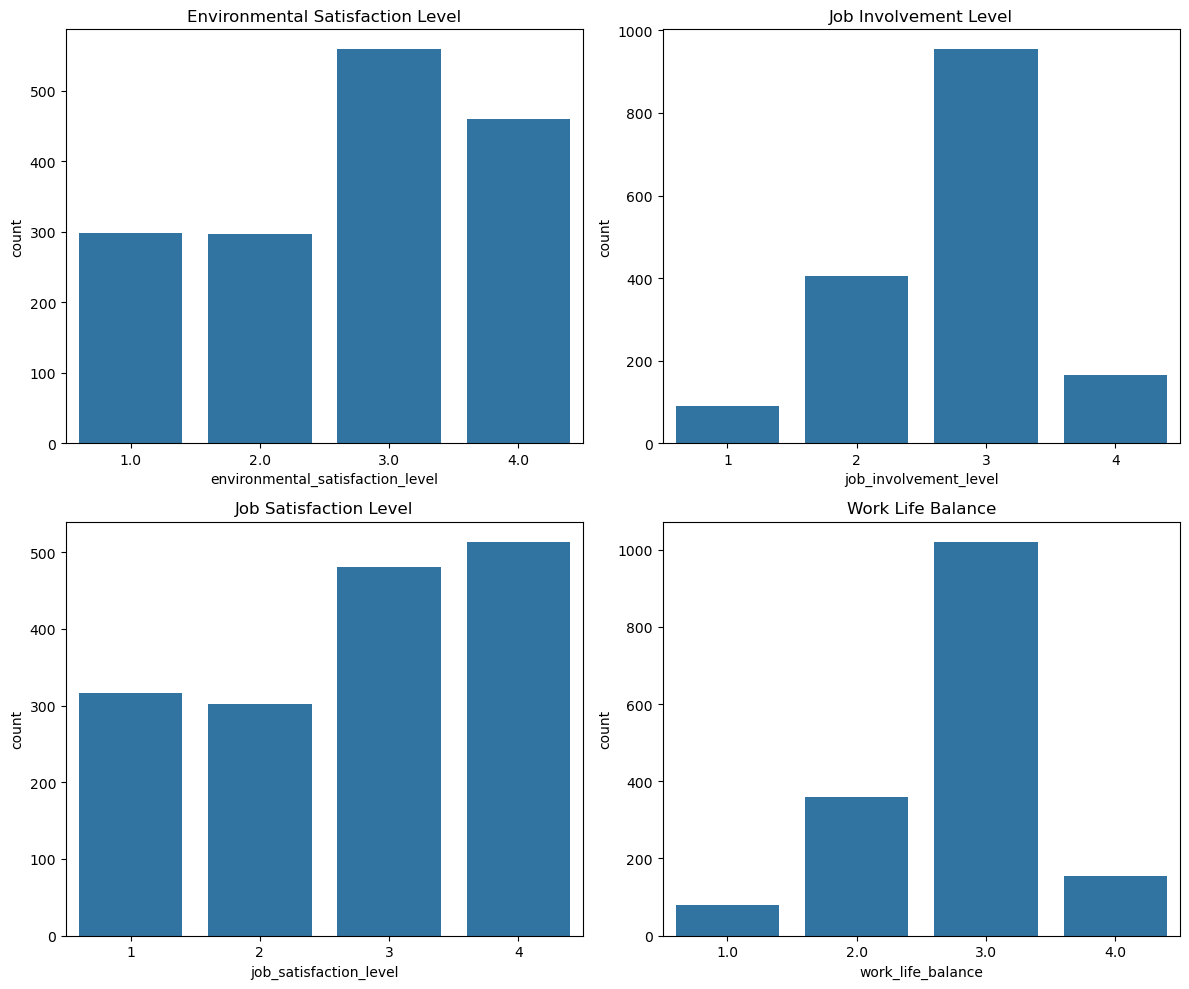

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subgráficos para cada columna de satisfacción
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas

# Graficar cada columna en un subgráfico
sns.countplot(data=df, x='environmental_satisfaction_level', ax=axes[0, 0])
axes[0, 0].set_title('Environmental Satisfaction Level')

sns.countplot(data=df, x='job_involvement_level', ax=axes[0, 1])
axes[0, 1].set_title('Job Involvement Level')

sns.countplot(data=df, x='job_satisfaction_level', ax=axes[1, 0])
axes[1, 0].set_title('Job Satisfaction Level')

sns.countplot(data=df, x='work_life_balance', ax=axes[1, 1])
axes[1, 1].set_title('Work Life Balance')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

Conclusiones de las gráficas descriptivas:
- La satisfacción respecto al entorno de trabajo parece ser alta.
- El compromiso con el trabajo tiende a ser aceptable.
- La satisfacción con el trabajo sería alta.
- El equilibro percibido de la vida personal y profesional es aceptable también.

In [44]:
# Definimos una función para obtener los porcentajes de cada variable de la tabla
lista_categoricas = ["employee_turnover", "business_travel_frequency", "gender", "marital_status", "overtime_hours", "standard_work_hours", "remote_work", "job_level"]

In [45]:
# Definimos una función para obtener los porcentajes de cada variable de la tabla
def porcentajes(lista_categoricas):
    resultados = {}  # Diccionario para guardar los resultados
    for x in lista_categoricas:
        porcentaje = df[x].value_counts(normalize=True) * 100  # Aplicar a cada columna
        resultados[x] = porcentaje  # Guardamos el resultado en el diccionario
    
    return resultados  # Devolvemos el diccionario con todos los porcentajes

# Llamamos a la función
porcentajes(lista_categoricas)

{'employee_turnover': employee_turnover
 no     83.952912
 yes    16.047088
 Name: proportion, dtype: float64,
 'business_travel_frequency': business_travel_frequency
 unknown              47.831475
 travel_rarely        36.307311
 travel_frequently    10.223048
 non_travel            5.638166
 Name: proportion, dtype: float64,
 'gender': gender
 male      60.16109
 female    39.83891
 Name: proportion, dtype: float64,
 'marital_status': marital_status
 unknown     40.334572
 married     27.199504
 single      20.136307
 divorced    12.329616
 Name: proportion, dtype: float64,
 'overtime_hours': overtime_hours
 no      42.255266
 none    41.883519
 yes     15.861214
 Name: proportion, dtype: float64,
 'standard_work_hours': standard_work_hours
 part_time    55.018587
 full_time    24.039653
 none         20.941760
 Name: proportion, dtype: float64,
 'remote_work': remote_work
 yes    61.957869
 no     38.042131
 Name: proportion, dtype: float64,
 'job_level': job_level
 2    36.988848


Antes de poner la atención en la analítica diagnóstica vamos a intentar comprender los datos observados en la tabla anterior:

- Frecuencia de viajes de empresa ("business_travel_frequency"): La categoría más frecuente es "unknown" (772 casos, 48 %). Esto puede ser preocupante a la hora de establecer conclusiones de resultados ya que hay muchos valores desconocidos. Podría valer la pena investigar si los valores "unknown" pueden ser imputados o descartados.

- Género ("gender"): Predominan los hombres (971 casos, 60 %) frente a las mujeres (643 casos, 39,84 %). **Podría analizarse si hay diferencias en rotación por género.**

- Estado civil ("marital_status"): Hay muchos valores "unknown" (651 casos,  40,33 %), lo que nuevamente sugiere problemas con la calidad de los datos. **Si esta variable fuera relevante**, podríamos considerar estrategias de imputación.

- Horas extra (overtime_hours): La mayoría de empleados no hacen horas extra (682 casos, 42,25%). Puede ser **interesante ver si hay relación entre hacer horas extra y la rotación.**

- Tipo de jornada (standard_work_hours): 888 empleados (55,02 %) trabajan a tiempo parcial. Esto puede ser un **factor relevante para analizar la rotación.**

- Trabajo remoto (remote_work): 1000 empleados trabajan en remoto (61,95 %). Podríamos **analizar si el trabajo remoto reduce la rotación.**

## 3.2.- 📊 Análisis Diagnóstico de Variables Categóricas Ordinales

         A. Análisis Bivariado

In [46]:
# Tablas de frecuencia/proporciones de los diferentes niveles de satisficción del empleado cruzándola con las diferentes variables.
# Se usa normalize=True para mostrar los datos en porcentajes.

for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['employee_turnover'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
employee_turnover,,,,
no,13.754647,15.551425,29.925651,24.72119
yes,4.708798,2.850062,4.708798,3.77943


'\n'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
employee_turnover,,,,
no,3.531599,20.446097,50.681537,9.29368
yes,1.982652,4.708798,8.488228,0.86741


'\n'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
employee_turnover,,,,
no,15.303594,15.427509,25.092937,28.128872
yes,4.337051,3.283767,4.708798,3.717472


'\n'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
employee_turnover,,,,
no,3.469641,18.339529,54.213135,7.930607
yes,1.425031,3.903346,9.045849,1.672862


'\n'

Estas tablas nos muestran como los empleados que "no" han rotado ("employee_turnover") presentan mayores ninveles de satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los que "si" han rotado.

**Análisis cruzado entre la rotación y variables de satisfacción laboral**

Se han analizado varias dimensiones de satisfacción y balance laboral en relación con la rotación de empleados. Las principales conclusiones son:

- 🏢 **Satisfacción con el entorno laboral:** Los empleados con niveles medios y altos de satisfacción tienden a permanecer en la empresa. La rotación se reduce significativamente a medida que aumenta la satisfacción.
  
- 💼 **Nivel de implicación laboral:** La implicación en el trabajo es uno de los factores más relevantes. Los empleados con un alto nivel de implicación (nivel 4) presentan la rotación más baja del conjunto.
  
- 😊 **Satisfacción general con el trabajo:** La mayoría de quienes se quedan en la empresa reportan niveles altos o medios de satisfacción, mientras que la rotación se concentra ligeramente más en niveles bajos.
  
- ⚖️ **Equilibrio vida-trabajo:** Un buen balance se asocia con menor rotación. La mayor parte de los empleados que se quedan tienen un balance adecuado (nivel 3 o 4).

En resumen, los niveles de satisfacción e implicación laboral muestran una relación inversa con la rotación: **a mayor satisfacción e implicación, menor probabilidad de abandono**. Esto refuerza la importancia de trabajar en el clima y la cultura laboral como estrategia para retener talento.


In [47]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['education_level'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
education_level,,,,
1,1.610905,2.230483,4.151177,3.159851
2,3.593556,3.841388,6.133829,5.885998
3,6.753408,6.319703,14.250310,11.152416
4,5.947955,5.018587,9.355638,7.249071
5,0.557621,0.991326,0.743494,1.053284


'\n'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
education_level,,,,
1,0.867410,3.035936,6.629492,0.619579
2,0.929368,5.390335,11.152416,1.982652
3,1.982652,9.107807,22.924411,4.460967
4,1.548947,6.939281,16.542751,2.540273
5,0.185874,0.681537,1.920694,0.557621


'\n'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
education_level,,,,
1,2.044610,1.796778,3.531599,3.779430
2,3.593556,3.655514,5.638166,6.567534
3,8.054523,8.364312,10.842627,11.214374
4,5.142503,4.584882,8.674102,9.169765
5,0.805452,0.309789,1.115242,1.115242


'\n'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
education_level,,,,
1,0.371747,2.726146,6.939281,1.115242
2,1.053284,4.213135,12.267658,1.920694
3,2.044610,9.417596,23.729864,3.283767
4,1.301115,5.452292,17.719950,3.097893
5,0.123916,0.433705,2.602230,0.185874


'\n'

Estas tablas nos muestran como los empleados que tienen un nivel educativo mayor ("education_level") presentan mayores ninveles de satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados con menores niveles educativos.

**Relación entre Nivel Educativo y Variables de Satisfacción Laboral**

Se ha analizado cómo varían distintos niveles de satisfacción y balance laboral en función del nivel educativo de los empleados. Las principales conclusiones son:

- 📚 Los empleados con **nivel educativo medio (nivel 3)** presentan en general **los valores más altos de satisfacción con el entorno laboral, implicación, satisfacción general y balance vida-trabajo**.
  
- 📉 Los extremos educativos (niveles 1 y 5) aparecen menos representados y tienden a mostrar porcentajes más bajos en todas las dimensiones analizadas.

- 💡 Este patrón podría sugerir que los empleados con educación intermedia tienen un mejor encaje o estabilidad dentro del entorno organizativo actual, mientras que aquellos con niveles muy bajos o muy altos podrían experimentar un menor grado de ajuste o satisfacción.

Este análisis puede resultar útil para comprender cómo influyen los factores educativos en la percepción del entorno laboral y en el compromiso general con la organización.


In [48]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['gender'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
gender,,,,
female,7.311029,7.372986,14.002478,11.152416
male,11.152416,11.028501,20.631970,17.348203


'\n'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
gender,,,,
female,2.044610,10.594796,23.358116,3.841388
male,3.469641,14.560099,35.811648,6.319703


'\n'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
gender,,,,
female,8.054523,8.054523,12.267658,11.462206
male,11.586121,10.656753,17.534077,20.384139


'\n'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
gender,,,,
female,1.920694,8.736059,25.340768,3.841388
male,2.973978,13.506815,37.918216,5.762082


'\n'

Estas tablas nos muestran como la variable de género influye en los niveles de satisfación:
-En general las mujeres muestran un mayor nivel de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados de sexo masculino

**Relación entre Género y Variables de Satisfacción Laboral**

Al analizar las variables de satisfacción e implicación laboral según el género, se observan algunas diferencias notables:

- 📍 En todos los indicadores analizados (`environmental_satisfaction_level`, `job_involvement_level`, `job_satisfaction_level`, `work_life_balance`), **las mujeres presentan porcentajes más altos que los hombres en los niveles más positivos**.
  
- 💼 En particular, las mujeres destacan por una **mayor implicación laboral** y una **satisfacción más alta tanto con el trabajo como con el entorno**.
  
- ⚖️ En términos de equilibrio entre vida personal y laboral, las mujeres también reportan mejores resultados.

Estos datos sugieren que las mujeres podrían tener una **percepción más positiva o más comprometida con su entorno laboral** en comparación con sus compañeros hombres. También podrían reflejar una mayor implicación emocional o un estilo de comunicación diferente en las evaluaciones laborales.

No obstante, es importante tener en cuenta posibles sesgos en la autopercepción o la cultura organizacional al interpretar estas diferencias.


In [49]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['job_level'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
job_level,,,,
1,6.691450,6.939281,12.701363,9.975217
2,6.381660,7.249071,12.267658,11.090458
3,2.912020,2.540273,5.947955,3.593556
4,1.548947,0.867410,2.416357,2.168525
5,0.929368,0.805452,1.301115,1.672862


'\n'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
job_level,,,,
1,2.168525,9.107807,21.189591,3.841388
2,2.230483,8.736059,22.057001,3.965304
3,0.619579,4.399009,8.798017,1.177200
4,0.185874,1.796778,4.089219,0.929368
5,0.309789,1.115242,3.035936,0.247831


'\n'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
job_level,,,,
1,7.001239,7.001239,10.842627,11.462206
2,6.939281,6.629492,11.090458,12.329616
3,3.469641,2.602230,4.399009,4.522924
4,1.425031,1.486989,1.796778,2.292441
5,0.805452,0.991326,1.672862,1.239157


'\n'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
job_level,,,,
1,2.106568,8.302354,22.800496,3.097893
2,1.672862,7.806691,23.605948,3.903346
3,0.743494,3.221809,9.355638,1.672862
4,0.309789,1.796778,4.337051,0.557621
5,0.061958,1.115242,3.159851,0.371747


'\n'

Estas tablas nos muestran como la variable de nivel del nivel jerárquico del puesto del empleado influye en los niveles de satisfación:
-En general se puede observar que a mayor nivel gerarquico del puesto del empleado, presentan un menor grado de nivel de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados con menores niveles jerarquicos. 

**Relación entre Nivel de Trabajo y Variables de Satisfacción Laboral**

Al cruzar los distintos niveles de trabajo (`job_level`) con variables de satisfacción y balance laboral, se observa un patrón claro:

- Los niveles bajos e intermedios (`job_level` 1 y 2) muestran **mayores porcentajes de satisfacción con el entorno, implicación laboral, satisfacción general y equilibrio vida-trabajo**.
  
- A medida que aumenta el nivel de trabajo, **disminuye la proporción de empleados con percepciones positivas en estas dimensiones**. Los niveles 4 y 5 presentan cifras considerablemente más bajas en comparación con los niveles inferiores.

- Esto podría deberse a un **mayor nivel de exigencia, responsabilidad o estrés en los cargos superiores**, lo que impacta negativamente en la percepción del entorno y la experiencia laboral.

Este análisis sugiere que los empleados con cargos más altos pueden beneficiarse de **estrategias de apoyo específicas**, como políticas de conciliación, reconocimiento profesional o mejoras en el entorno de trabajo para preservar su bienestar.


In [50]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['overtime_hours'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
overtime_hours,,,,
no,8.116481,8.054523,14.436183,11.648079
none,7.744734,7.372986,14.807931,11.957869
yes,2.602230,2.973978,5.390335,4.894672


'\n'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
overtime_hours,,,,
no,2.354399,11.028501,24.535316,4.337051
none,2.044610,10.099133,25.464684,4.275093
yes,1.115242,4.027261,9.169765,1.548947


'\n'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
overtime_hours,,,,
no,7.682776,8.240397,13.258984,13.073110
none,9.169765,7.249071,11.400248,14.064436
yes,2.788104,3.221809,5.142503,4.708798


'\n'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
overtime_hours,,,,
no,2.168525,8.612144,27.075589,4.399009
none,1.920694,10.408922,25.588600,3.965304
yes,0.805452,3.221809,10.594796,1.239157


'\n'

Estas tablas nos muestran como si el empleado trabaja horas extras (Yes/No) influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados trabajan horas extras presentan menor nivel de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que no hacen horas extras. 

**Relación entre Horas Extra y Variables de Satisfacción e Implicación Laboral**

El análisis cruzado entre el tipo de jornada (`overtime_hours`) y las variables de satisfacción revela un patrón consistente y significativo:

- 👎 Los empleados que realizan horas extra presentan, en promedio, **niveles más bajos de satisfacción con el entorno laboral, implicación, satisfacción general y equilibrio vida-trabajo**.

- ✅ Por el contrario, quienes **no hacen horas extra** o tienen un horario estándar muestran **mayores niveles de bienestar, implicación y satisfacción**.

- 🔄 Este hallazgo **rompe la creencia de que hacer más horas está relacionado con mayor compromiso**. De hecho, los datos sugieren que **las horas extra podrían ser un factor de riesgo para la motivación y el bienestar laboral**.

Este análisis refuerza la importancia de **fomentar jornadas razonables y políticas de conciliación**, especialmente si se busca reducir la rotación y mejorar la satisfacción de los empleados.


In [51]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['standard_work_hours'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
standard_work_hours,,,,
full_time,4.708798,4.275093,8.178439,6.877323
none,4.213135,4.089219,6.381660,6.257745
part_time,9.541512,10.037175,20.074349,15.365551


'\n'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
standard_work_hours,,,,
full_time,1.548947,6.505576,13.692689,2.292441
none,1.177200,4.646840,12.701363,2.416357
part_time,2.788104,14.002478,32.775713,5.452292


'\n'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
standard_work_hours,,,,
full_time,4.956629,4.151177,6.753408,8.178439
none,4.584882,3.159851,6.691450,6.505576
part_time,10.099133,11.400248,16.356877,17.162330


'\n'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
standard_work_hours,,,,
full_time,1.115242,5.142503,15.675341,2.106568
none,0.805452,4.956629,13.073110,2.106568
part_time,2.973978,12.143742,34.510533,5.390335


'\n'

Estas tablas nos muestran como la clasificación de jornada (Full Time/Part Time) influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados trabajan part time presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que trabajan full time. 

**Relación entre Tipo de Jornada Laboral y Satisfacción Laboral**

El análisis de las variables de satisfacción en función del tipo de jornada (`standard_work_hours`) muestra patrones muy claros:

- 👥 Los empleados que trabajan **a tiempo parcial** reportan **niveles mucho más altos de satisfacción ambiental, implicación en el trabajo, satisfacción general y equilibrio vida-trabajo**, en comparación con aquellos que trabajan a jornada completa o que no tienen jornada definida.

- 💡 Especialmente destaca la implicación laboral (nivel 3) y la percepción del balance personal-laboral, que alcanzan sus valores más altos entre los empleados a jornada parcial.

- 🧩 Estos resultados sugieren que **la flexibilidad horaria o la reducción de jornada mejora significativamente la experiencia laboral**, sin afectar negativamente al compromiso del empleado.

Este hallazgo puede ser de gran valor para la empresa, ya que muestra cómo **políticas de conciliación o jornadas más adaptables pueden mejorar el clima laboral**, aumentar la satisfacción y posiblemente reducir la rotación.


In [52]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['years_at_company'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
years_at_company,,,,
0,0.371747,0.743494,0.743494,0.867410
1,2.044610,1.920694,3.655514,2.973978
2,1.920694,1.363073,2.973978,2.478315
3,2.416357,1.239157,2.478315,2.602230
4,1.425031,1.115242,2.292441,2.230483
5,2.540273,1.982652,4.708798,3.655514
6,0.495663,1.239157,1.920694,1.177200
7,0.805452,1.672862,2.168525,2.478315
8,0.991326,1.177200,2.912020,1.486989


'\n'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
years_at_company,,,,
0,0.185874,0.557621,1.858736,0.123916
1,0.681537,3.655514,5.266419,0.991326
2,0.495663,2.230483,5.390335,0.619579
3,0.371747,1.920694,5.576208,0.867410
4,0.557621,1.796778,3.965304,0.743494
5,0.619579,2.788104,8.240397,1.239157
6,0.185874,1.239157,2.850062,0.557621
7,0.805452,1.548947,3.531599,1.239157
8,0.309789,1.053284,4.089219,1.115242


'\n'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
years_at_company,,,,
0,0.743494,0.309789,0.991326,0.681537
1,1.920694,2.416357,2.973978,3.283767
2,1.301115,1.425031,2.973978,3.035936
3,1.982652,1.548947,2.788104,2.416357
4,1.796778,1.301115,1.982652,1.982652
5,2.478315,2.416357,4.151177,3.841388
6,0.805452,0.867410,0.929368,2.230483
7,1.734820,0.929368,1.796778,2.664188
8,0.867410,1.796778,2.788104,1.115242


'\n'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
years_at_company,,,,
0,0.185874,0.557621,1.734820,0.247831
1,0.619579,2.106568,6.753408,1.115242
2,0.495663,1.796778,5.824040,0.619579
3,0.557621,1.486989,5.700124,0.991326
4,0.309789,2.168525,4.275093,0.309789
5,0.867410,2.416357,7.868649,1.734820
6,0.247831,1.610905,2.664188,0.309789
7,0.185874,1.734820,4.399009,0.805452
8,0.123916,1.301115,4.213135,0.929368


'\n'

Estas tablas nos muestran como los años en la compañia influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados tienen menos años en la empresa presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que tienen más años trabajando en la empresa. 

Los datos parecen representar la distribución de los niveles de implicación laboral (Job Involvement Level) según los años en la empresa (Years at Company).
Filas (Índice: years_at_company)
Representan el número de años que un empleado ha trabajado en la empresa.
Hay valores desde 0 años hasta más de 40 años, aunque algunos valores están ausentes (por ejemplo, no hay 28, 35, 38, 39).
Columnas (job_involvement_level: 1, 2, 3, 4)
Representan diferentes niveles de implicación laboral:
1 = Muy baja implicación
2 = Baja implicación
3 = Alta implicación
4 = Muy alta implicación
Valores en el DataFrame
Son probablemente proporciones o conteos de empleados con un cierto nivel de implicación en cada grupo de años en la empresa.

**Relación entre Antigüedad en la Empresa y Satisfacción Laboral**

El análisis cruzado entre la variable `years_at_company` y distintas dimensiones de satisfacción laboral revela varios patrones relevantes:

- 🏁 Los empleados con **menos de 10 años** en la empresa presentan los **niveles más altos de satisfacción ambiental, implicación, satisfacción general y equilibrio personal-laboral**.
  
- ⏳ A partir de los **10-15 años**, estas proporciones tienden a estabilizarse o disminuir ligeramente, posiblemente por una combinación de desgaste, rutina o menor reconocimiento a largo plazo.

- 📈 El punto de **mayor implicación y satisfacción** suele darse entre los **5 y 7 años**, lo cual podría coincidir con una etapa de crecimiento o consolidación profesional dentro de la organización.

- 🧘‍♀️ En cuanto al equilibrio vida-trabajo, se observa que los primeros años suelen ofrecer **mejores condiciones de conciliación**, mientras que los empleados más veteranos reportan niveles más bajos.

Estos resultados pueden ser clave para diseñar estrategias de retención y bienestar que **varíen según la antigüedad del empleado**, adaptando beneficios, reconocimientos o condiciones laborales según la etapa profesional en la que se encuentre.


In [53]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['birth_year'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
birth_year,,,,
1963,0.123916,0.000000,0.185874,0.000000
1964,0.123916,0.123916,0.371747,0.000000
1965,0.123916,0.123916,0.123916,0.557621
1966,0.061958,0.061958,0.061958,0.123916
1967,0.185874,0.061958,0.371747,0.433705
1968,0.185874,0.185874,0.681537,0.495663
1969,0.247831,0.123916,0.371747,0.495663
1970,0.309789,0.123916,0.371747,0.433705
1971,0.185874,0.123916,0.495663,0.371747


'\n'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
birth_year,,,,
1963,0.061958,0.061958,0.123916,0.061958
1964,0.000000,0.309789,0.247831,0.061958
1965,0.061958,0.247831,0.619579,0.000000
1966,0.000000,0.061958,0.123916,0.123916
1967,0.061958,0.061958,0.805452,0.123916
1968,0.061958,0.371747,0.867410,0.247831
1969,0.000000,0.061958,1.115242,0.061958
1970,0.000000,0.309789,0.681537,0.247831
1971,0.061958,0.495663,0.557621,0.061958


'\n'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
birth_year,,,,
1963,0.185874,0.000000,0.000000,0.123916
1964,0.123916,0.000000,0.123916,0.371747
1965,0.123916,0.247831,0.309789,0.247831
1966,0.000000,0.000000,0.185874,0.123916
1967,0.433705,0.185874,0.185874,0.247831
1968,0.309789,0.433705,0.247831,0.557621
1969,0.309789,0.123916,0.495663,0.309789
1970,0.247831,0.123916,0.433705,0.433705
1971,0.185874,0.247831,0.309789,0.433705


'\n'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
birth_year,,,,
1963,0.061958,0.000000,0.123916,0.123916
1964,0.061958,0.309789,0.247831,0.000000
1965,0.000000,0.495663,0.433705,0.000000
1966,0.061958,0.123916,0.123916,0.000000
1967,0.061958,0.371747,0.557621,0.061958
1968,0.000000,0.185874,1.177200,0.185874
1969,0.123916,0.371747,0.619579,0.123916
1970,0.061958,0.309789,0.681537,0.185874
1971,0.123916,0.309789,0.619579,0.123916


'\n'

Estas tablas nos muestran como la edad influye en los niveles de satisfación:
-En general se puede observar que mientras los empleados tienen más edad presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados más jóvenes.

**Relación entre Año de Nacimiento y Satisfacción Laboral**  

Se ha analizado cómo varían distintos niveles de satisfacción, implicación y equilibrio vida-trabajo en función del año de nacimiento de los empleados. El análisis revela tendencias generacionales claras:

- 🧒 **Las generaciones más jóvenes** (especialmente quienes nacieron entre 1985 y 1995) presentan **los niveles más altos de satisfacción con el entorno, implicación laboral, satisfacción general y equilibrio vida-trabajo**.

- 🧓 Por el contrario, **los empleados de mayor edad** (nacidos antes de 1975) tienden a mostrar **niveles más bajos en todas las variables**, lo que podría deberse a distintos factores como desgaste laboral, desajuste generacional o menor identificación con la cultura organizativa actual.

- 📉 También se observa que los empleados más recientes (nacidos después del año 2000) **aún no presentan valores especialmente altos**, probablemente debido a su menor experiencia laboral o etapa de adaptación.

Este análisis sugiere que la edad (o generación) puede influir en cómo se percibe el entorno laboral. Por tanto, las estrategias de retención, motivación y bienestar deberían **adaptarse a los distintos grupos generacionales** para ser verdaderamente efectivas.


In [54]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['remote_work'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

'Tabla de frecuencia/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
remote_work,,,,
no,6.939281,6.877323,13.630731,10.594796
yes,11.524164,11.524164,21.003717,17.905824


'\n'

'Tabla de frecuencia/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
remote_work,,,,
no,1.672862,10.037175,22.428748,3.903346
yes,3.841388,15.117720,36.741016,6.257745


'\n'

'Tabla de frecuencia/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
remote_work,,,,
no,7.930607,7.311029,11.586121,11.214374
yes,11.710037,11.400248,18.215613,20.631970


'\n'

'Tabla de frecuencia/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
remote_work,,,,
no,1.858736,9.107807,23.729864,3.345725
yes,3.035936,13.135068,39.529120,6.257745


'\n'

Estas tablas nos muestran como si el pleado trabaja en remoto (yes/no) remoto influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados trabajan en remoto, presentan presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que no trabajan de manera remota. 

**Relación entre Trabajo Remoto y Satisfacción Laboral**

El análisis comparativo entre empleados que trabajan en remoto y los que no revela una **tendencia clara y consistente**:

- 💻 **Los empleados que trabajan en remoto presentan niveles más altos de satisfacción ambiental, implicación en el trabajo, satisfacción general y equilibrio vida-trabajo.**

- 📈 En particular, las diferencias en la **implicación (nivel 3: 36.74% remoto vs 22.43% no remoto)** y el **equilibrio personal-laboral (nivel 3: 39.53% remoto vs 23.73% no remoto)** son especialmente destacadas.

- 🧠 Estos datos sugieren que el trabajo en remoto **no solo mejora la percepción del entorno**, sino que también **favorece el compromiso y el bienestar emocional**.

- 🛠️ Este hallazgo puede ser clave para la empresa a la hora de **diseñar políticas de flexibilidad laboral**, ya que demuestra que el trabajo remoto puede ser una herramienta potente para **aumentar la satisfacción y la retención del talento**.

En resumen, **el trabajo remoto parece aportar múltiples beneficios tanto para el empleado como para la organización**.


In [55]:
# Definir rangos de salario (puedes ajustarlos según necesidad)
bins = [0, 30000, 60000, 90000, 120000, 200000]  # Límites de los grupos
labels = ['0-30e', '30e-60e', '60e-90e', '90e-120e', '120e+']  # Etiquetas para los grupos

# Crear una nueva columna categórica en df
df['salary_range'] = pd.cut(df['annual_salary'], bins=bins, labels=labels)

# Crear tablas de frecuencias/proporciones para cada variable de satisfacción
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df['salary_range'], df[col], normalize=True) * 100
    display(f"Tabla de frecuencias/proporciones para {col}:\n", tc, "\n")

'Tabla de frecuencias/proporciones para environmental_satisfaction_level:\n'

environmental_satisfaction_level,1.0,2.0,3.0,4.0
salary_range,,,,
0-30e,4.832714,4.460967,9.541512,7.001239
30e-60e,8.488228,9.727385,15.241636,14.064436
60e-90e,1.053284,0.867410,1.982652,1.486989
90e-120e,2.044610,1.796778,4.708798,2.540273
120e+,2.044610,1.548947,3.159851,3.407683


'\n'

'Tabla de frecuencias/proporciones para job_involvement_level:\n'

job_involvement_level,1,2,3,4
salary_range,,,,
0-30e,1.425031,6.753408,14.807931,2.850062
30e-60e,2.726146,11.152416,28.438662,5.204461
60e-90e,0.371747,1.363073,3.097893,0.557621
90e-120e,0.495663,3.221809,6.691450,0.681537
120e+,0.495663,2.664188,6.133829,0.867410


'\n'

'Tabla de frecuencias/proporciones para job_satisfaction_level:\n'

job_satisfaction_level,1,2,3,4
salary_range,,,,
0-30e,4.460967,5.700124,7.496902,8.178439
30e-60e,9.789343,8.054523,14.436183,15.241636
60e-90e,1.239157,1.177200,1.425031,1.548947
90e-120e,2.416357,1.610905,3.159851,3.903346
120e+,1.734820,2.168525,3.283767,2.973978


'\n'

'Tabla de frecuencias/proporciones para work_life_balance:\n'

work_life_balance,1.0,2.0,3.0,4.0
salary_range,,,,
0-30e,1.486989,5.700124,16.232962,2.416357
30e-60e,2.168525,10.842627,29.801735,4.708798
60e-90e,0.247831,0.991326,3.531599,0.619579
90e-120e,0.495663,2.230483,7.187113,1.177200
120e+,0.495663,2.478315,6.505576,0.681537


'\n'

Estas tablas nos muestran como el salario anual influye en los niveles de satisfación del empleado:
-En general se puede observar que a mayor salario, los emmpleados presentan presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que tienen un salario anual menor. 

**Relación entre Nivel Salarial y Satisfacción Laboral**

Se ha analizado cómo varían los niveles de satisfacción, implicación y equilibrio personal-laboral en función del salario anual, agrupado por tramos. Las conclusiones son especialmente relevantes para la gestión del talento y las políticas de compensación:

- 💸 **Los empleados que ganan entre 30.000€ y 60.000€** son los que presentan **mayor implicación en el trabajo**, **mayor satisfacción general**, **mejor percepción del entorno laboral** y **el mejor equilibrio vida-trabajo**.

- 📉 En contraste, los empleados con **salarios muy altos (más de 90.000€)** presentan niveles **bajos de satisfacción y de balance personal-laboral**, lo que sugiere que **un salario elevado no garantiza bienestar ni compromiso**.

- 🧩 También se observa que **los empleados con salarios muy bajos (menos de 30.000€)** muestran niveles más bajos en comparación con el rango medio, aunque en algunos aspectos están por encima del grupo de salarios altos.

Este análisis muestra que el salario **no es linealmente proporcional a la satisfacción laboral**, y que el tramo medio podría ser donde el empleado se siente **más motivado, cómodo y equilibrado**.

📌 Esto puede ser clave para las estrategias de retención: **más salario no siempre significa más compromiso**, y hay que considerar **otros factores motivacionales no económicos** para mantener el bienestar.



# ❇️ Conclusiones Finales

**Rotación de Empleados:**

La rotación de empleados está influenciada por factores como el género, las horas extras, el trabajo remoto, la frecuencia de viajes laborales y el estado civil.

- Horas extras: Los empleados que trabajan horas extras tienen una mayor probabilidad de abandonar la empresa, lo que sugiere que la sobrecarga laboral puede ser un factor clave.

- Frecuencia de viajes laborales: Los empleados que viajan con frecuencia también muestran una mayor tendencia a rotar, posiblemente debido al impacto en el equilibrio entre vida personal y laboral.
- Estado civil: Los empleados solteros tienen una mayor rotación en comparación con los casados o divorciados, lo que podría estar relacionado con diferentes prioridades o estabilidad personal.


**Satisfacción Laboral:**

Los niveles de satisfacción laboral, ambiental, involucramiento en el trabajo y equilibrio entre vida personal y laboral están estrechamente relacionados con la retención de empleados.

- Trabajo remoto y tiempo parcial: Los empleados que trabajan de forma remota o a tiempo parcial  reportan mayores niveles de satisfacción, lo que sugiere que estas políticas pueden ser efectivas para mejorar la retención. 
Los empleados que trabajan de forma remota o a tiempo parcial tienden a reportar mayores niveles de satisfacción en comparación con los que trabajan a tiempo completo o de manera presencial.

- Bajo equilibrio vida-trabajo: Los empleados con menor satisfacción en el equilibrio entre vida personal y laboral tienen una mayor probabilidad de abandono, destacando la importancia de políticas que promuevan este equilibrio.


**Factores Demográficos:**

- Edad y antigüedad: Los empleados más jóvenes y con menos años en la empresa tienden a mostrar mayores niveles de abandono, a pesar de reportar altos niveles de satisfacción. Esto podría deberse a la búsqueda de nuevas oportunidades o falta de compromiso a largo plazo.
- Género: Las mujeres, en general, reportan mayores niveles de satisfacción en comparación con los hombres, aunque no necesariamente tienden a no querer dejar la empresa.



**Jerarquía y Salario:**

- A mayor nivel jerárquico y salario, los empleados tienden a reportar mayores niveles de satisfacción. Sin embargo, los niveles jerárquicos más altos también pueden estar asociados con mayores niveles de estrés y menor equilibrio entre vida personal y laboral, lo que puede aumentar su riesgo de rotación..

- Salarios bajos: Los empleados con salarios más bajos tienen una mayor probabilidad de rotar, lo que sugiere que la compensación económica sigue siendo un factor determinante en la retención.

### **Calidad de los Datos:**

Existen valores desconocidos ("unknown") en variables clave como la frecuencia de viajes laborales y el estado civil, lo que puede limitar la capacidad de obtener conclusiones precisas. Mejorar la calidad de los datos es esencial para futuros análisis y para diseñar estrategias más efectivas.

### Recomendaciones:

1. Fomentar el equilibrio entre vida personal y laboral: 
- Reducir las horas extras y fomentar políticas de trabajo remoto o flexible.
- Implementar programas de bienestar que incluyan apoyo emocional y actividades para reducir el estrés.

2. Diseñar programas de retención para empleados jóvenes:
- Crear planes de desarrollo profesional y oportunidades de crecimiento para empleados con menos antigüedad.
- Ofrecer incentivos personalizados para retener a los empleados más jóvenes.

3. Apoyar a empleados en niveles jerárquicos altos:
- Proveer recursos para manejar el estrés, como coaching ejecutivo o programas de mentoría.
- Asegurar que los líderes tengan acceso a tiempo libre y apoyo para mantener un equilibrio saludable.

4. Revisar la compensación económica:
- Evaluar los salarios y beneficios ofrecidos, especialmente para empleados en niveles bajos, para reducir la rotación relacionada con la insatisfacción económica.

5. Mejorar la calidad de los datos:
- Investigar y completar los valores desconocidos en variables clave como la frecuencia de viajes laborales y el estado civil.
- Implementar procesos de recolección de datos más rigurosos para garantizar análisis más precisos en el futuro.

*Notas Finales*
Estas conclusiones y recomendaciones proporcionan una base sólida para diseñar estrategias que reduzcan la rotación de empleados y mejoren la satisfacción laboral. Implementar estas acciones puede ayudar a la empresa a retener talento clave y mejorar el desempeño organizacional.
